# K-Means Clustering Algorithm

![alt text](https://raw.githubusercontent.com/enzoschitini/repository-data-science-library/refs/heads/main/K-Means/img/Clustering%20Algorithm.png)

In [1]:
# Importação de bibliotecas essenciais
import pandas as pd  # Manipulação de dados em DataFrames
import numpy as np  # Operações matemáticas e manipulação de arrays

# Bibliotecas de visualização de dados
import seaborn as sns  # Visualizações estatísticas
import matplotlib.pyplot as plt  # Visualizações estáticas

# Pré-processamento
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Clustering e métricas de distância
from sklearn.cluster import KMeans

# Redução de dimensionalidade e pipelines
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

# Pesquisa de hiperparâmetros
from sklearn.model_selection import GridSearchCV

# Configuração para exibir todas as colunas
pd.set_option('display.max_columns', None)

# Importação de funções matemáticas específicas
from math import pi  # Utilizado para cálculos envolvendo o número pi

### Visualização do dataset

In [2]:
df = pd.read_csv('data/df_for_k_means.csv')
back_up_dataset = df.copy()

df.head()

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single   58138        0         0   
1  2174        1954  Graduation         Single   46344        1         1   
2  4141        1965  Graduation       Together   71613        0         0   
3  6182        1984  Graduation       Together   26646        1         0   
4  5324        1981         PhD        Married   58293        1         0   

  Dt_Customer  Year  Month  Day  Age  Recency  Complain  Children  FamilySize  \
0  2012-09-04  2012      9    4   57       58         0         0           0   
1  2014-03-08  2014      3    8   60       38         0         2           2   
2  2013-08-21  2013      8   21   49       26         0         0           1   
3  2014-02-10  2014      2   10   30       26         0         1           2   
4  2014-01-19  2014      1   19   33       94         0         1           2   

   IsMarried  SeniorityDays  MntWines  MntFruits  MntMeatProducts  \
0          0            663       635         88              546   
1          0            113        11          1                6   
2          1            312       426         49              127   
3          1            139        11          4               20   
4          1            161       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  TotalMntSpent  \
0              172                88            88           1617   
1                2                 1             6             27   
2              111                21            42            776   
3               10                 3             5             53   
4               46                27            15            422   

   TotalPurchases  AvgPurchaseValue  NumDealsPurchases  AcceptedCmp1  \
0              25                64                  3             0   
1               6                 4                  2             0   
2              21                36                  1             0   
3               8                 6                  2             0   
4              19                22                  5             0   

   AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0             0             0             0             0   
1             0             0             0             0   
2             0             0             0             0   
3             0             0             0             0   
4             0             0             0             0   

   AcceptedAnyCampaign  Response  NumWebPurchases  NumCatalogPurchases  \
0                    0         1                8                   10   
1                    0         0                1                    1   
2                    0         0                8                    2   
3                    0         0                2                    0   
4                    0         0                5                    3   

   NumStorePurchases  NumWebVisitsMonth  WebVsStorePurchases        Date  \
0                  4                  7                    2  2012-09-04   
1                  2                  5                    0  2014-03-08   
2                 10                  4                    0  2013-08-21   
3                  4                  6                    0  2014-02-10   
4                  6                  5                    0  2014-01-19   

     IncomeRange  
0  41 Mil-61 Mil  
1  41 Mil-61 Mil  
2  61 Mil-82 Mil  
3  21 Mil-41 Mil  
4  41 Mil-61 Mil

### Removendo algumas colunas

In [3]:
df.drop(['Dt_Customer', 'Year', 'Month', 'Day', 'SeniorityDays', 'Date'], axis=1, inplace=True)

for x in list(df.select_dtypes('object').columns):
    df[x] = df[x].astype('category')

print(df.shape)
print(df.info())
df.head()

(2206, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2206 entries, 0 to 2205
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2206 non-null   int64   
 1   Year_Birth           2206 non-null   int64   
 2   Education            2206 non-null   category
 3   Marital_Status       2206 non-null   category
 4   Income               2206 non-null   int64   
 5   Kidhome              2206 non-null   int64   
 6   Teenhome             2206 non-null   int64   
 7   Age                  2206 non-null   int64   
 8   Recency              2206 non-null   int64   
 9   Complain             2206 non-null   int64   
 10  Children             2206 non-null   int64   
 11  FamilySize           2206 non-null   int64   
 12  IsMarried            2206 non-null   int64   
 13  MntWines             2206 non-null   int64   
 14  MntFruits            2206 non-null   int64   
 15  MntMeatPro

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single   58138        0         0   
1  2174        1954  Graduation         Single   46344        1         1   
2  4141        1965  Graduation       Together   71613        0         0   
3  6182        1984  Graduation       Together   26646        1         0   
4  5324        1981         PhD        Married   58293        1         0   

   Age  Recency  Complain  Children  FamilySize  IsMarried  MntWines  \
0   57       58         0         0           0          0       635   
1   60       38         0         2           2          0        11   
2   49       26         0         0           1          1       426   
3   30       26         0         1           2          1        11   
4   33       94         0         1           2          1       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         88              546              172                88   
1          1                6                2                 1   
2         49              127              111                21   
3          4               20               10                 3   
4         43              118               46                27   

   MntGoldProds  TotalMntSpent  TotalPurchases  AvgPurchaseValue  \
0            88           1617              25                64   
1             6             27               6                 4   
2            42            776              21                36   
3             5             53               8                 6   
4            15            422              19                22   

   NumDealsPurchases  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
0                  3             0             0             0             0   
1                  2             0             0             0             0   
2                  1             0             0             0             0   
3                  2             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp5  AcceptedAnyCampaign  Response  NumWebPurchases  \
0             0                    0         1                8   
1             0                    0         0                1   
2             0                    0         0                8   
3             0                    0         0                2   
4             0                    0         0                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                   10                  4                  7   
1                    1                  2                  5   
2                    2                 10                  4   
3                    0                  4                  6   
4                    3                  6                  5   

   WebVsStorePurchases    IncomeRange  
0                    2  41 Mil-61 Mil  
1                    0  41 Mil-61 Mil  
2                    0  61 Mil-82 Mil  
3                    0  21 Mil-41 Mil  
4                    0  41 Mil-61 Mil

### Normalização dos dados

In [4]:
df['ID'] = df['ID'].astype('int64')
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
features = numerical_cols.drop("ID")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

### Busca pelo melhor número de componentes

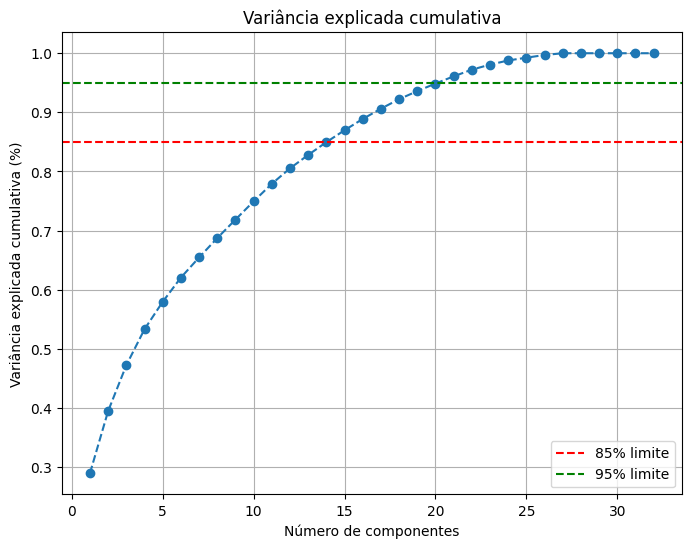

Número de componentes que explicam pelo menos 85% da variância: 15


In [5]:
pca_full = PCA()
pca_full.fit(X_scaled)

explained_variance = pca_full.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--')
plt.title('Variância explicada cumulativa')
plt.xlabel('Número de componentes')
plt.ylabel('Variância explicada cumulativa (%)')
plt.axhline(y=0.85, color='r', linestyle='--', label='85% limite')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% limite')
plt.legend()
plt.grid()
plt.show()

threshold = 0.85
optimal_components = np.argmax(np.cumsum(explained_variance) >= threshold) + 1
print(f"Número de componentes que explicam pelo menos 85% da variância: {optimal_components}")

## PCA - Principal Component Analysis

In [6]:
# PCA
pca = PCA(random_state=42, n_components=15)
principal_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 
                                                          'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15'])
pca_df['ID'] = df['ID']
pca_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  4.840995  0.103643 -0.145926 -2.091790  4.214282 -0.428195 -0.038301   
1 -3.031801  0.470791 -0.605195  1.843656  0.559014 -0.139889 -1.708668   
2  2.095488 -0.386209 -1.627537  0.013180  0.557211  0.482862 -0.013302   
3 -2.971885 -1.803144  0.091348 -0.654177 -0.986095  0.076721 -0.155830   
4 -0.524957 -0.241898 -0.579131 -1.662040 -1.521712  0.419675  0.919566   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.096651  1.062281  0.034846 -2.595904  1.415911 -0.252223 -0.386415   
1  1.114805 -0.077688  0.844955 -1.142457  0.209778 -0.614170  0.238058   
2 -1.182837 -0.160045 -0.418536  0.927895 -0.306843  0.395795  0.165477   
3 -0.988571  0.011731 -0.228406  0.375627 -0.214141  0.359433 -0.013989   
4  0.615909  0.030494 -0.010699 -0.325459  0.188740  1.145632 -0.585301   

       PC15    ID  
0  1.217836  5524  
1  0.036264  2174  
2  0.084093  4141  
3 -0.009659  6182  
4  0.324292  5324

In [7]:
df_model = pca_df.drop('ID', axis=1)

padronizador = StandardScaler()
df_padronizado = padronizador.fit_transform(df_model)

padronizador

StandardScaler()

In [8]:
num_features = list(df_model.select_dtypes('number').columns)
cat_features = list(df_model.select_dtypes('object').columns)

In [9]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_features)  # Drop='first' para evitar multicolinearidade
    ])

In [10]:
X_preprocessed = preprocessor.fit_transform(df_model)
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                  'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12',
                                  'PC13', 'PC14', 'PC15']),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 [])])

In [11]:
kmeans = KMeans(random_state=42)

param_grid = {
    'init': ['k-means++', 'random'],
    'max_iter': [100, 300, 500, 1000, 1100, 2000],
    'tol': [1e-4, 1e-3],
    'algorithm': ['auto', 'full', 'elkan']
}

grid_search = GridSearchCV(kmeans, param_grid, cv=3)

grid_search.fit(X_preprocessed)

print("Best parameters found: ", grid_search.best_params_, "\n")

c:\Users\schit\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\schit\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Best parameters found:  {'algorithm': 'elkan', 'init': 'k-means++', 'max_iter': 1000, 'tol': 0.0001} 



c:\Users\schit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
144 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\schit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 893, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "c:\Users\schit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\schit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line

### Método do cotovelo

c:\Users\schit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1435: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


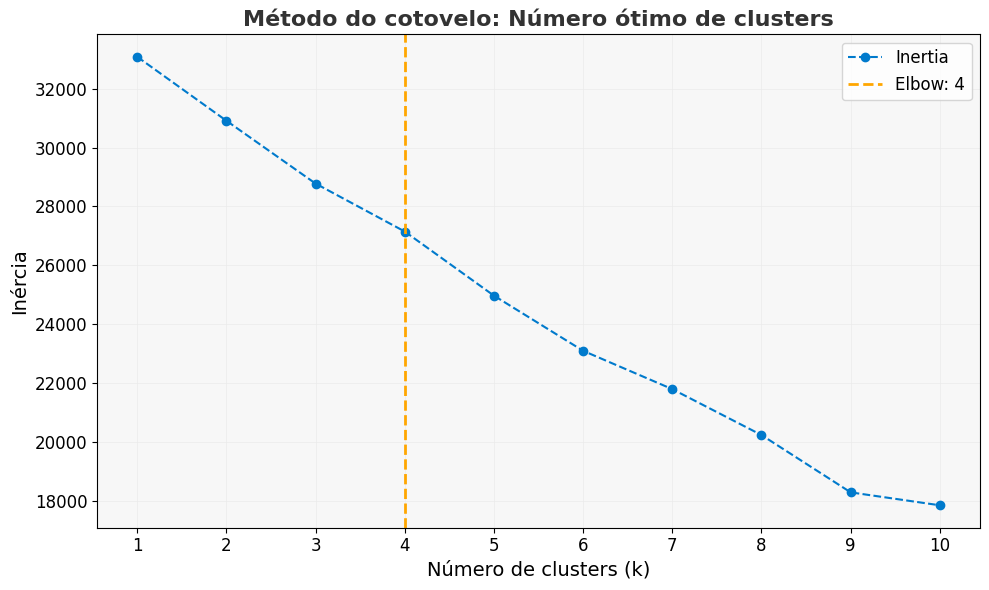

In [12]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=1000, algorithm='elkan', init='k-means++', tol=0.0001)
    kmeans.fit(X_preprocessed)
    inertia.append(kmeans.inertia_)

differences = np.diff(inertia)
elbow_point = np.argmin(differences) + 1

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--', color='#007acc', label='Inertia')
plt.axvline(x=elbow_point, color='#ffa600', linestyle='--', linewidth=2, label=f'Elbow: {elbow_point}')

plt.title('Método do cotovelo: Número ótimo de clusters', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Número de clusters (k)', fontsize=14)
plt.ylabel('Inércia', fontsize=14)
plt.xticks(k_values, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(color='#eaeaea', linestyle='-', linewidth=0.7, alpha=0.7)
plt.legend(fontsize=12, loc='best')
plt.gca().set_facecolor('#f7f7f7')

plt.tight_layout()
plt.show()

## Criando o modelo K-Means

In [13]:
kmeans = KMeans(n_clusters=4, max_iter=1000, algorithm='elkan', init='k-means++', random_state=42, tol=0.0001)
kmeans.fit(X_preprocessed)
df['grupo'] = kmeans.labels_
df_model['grupo'] = kmeans.labels_

kmeans

KMeans(algorithm='elkan', max_iter=1000, n_clusters=4, random_state=42)

In [14]:
pd.DataFrame(df.grupo.value_counts())

count
grupo       
3        895
2        782
1        499
0         30

In [15]:
df = back_up_dataset
df['Clusters'] = kmeans.labels_

# Cluster Analysis

In [16]:
df.head()

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single   58138        0         0   
1  2174        1954  Graduation         Single   46344        1         1   
2  4141        1965  Graduation       Together   71613        0         0   
3  6182        1984  Graduation       Together   26646        1         0   
4  5324        1981         PhD        Married   58293        1         0   

  Dt_Customer  Year  Month  Day  Age  Recency  Complain  Children  FamilySize  \
0  2012-09-04  2012      9    4   57       58         0         0           0   
1  2014-03-08  2014      3    8   60       38         0         2           2   
2  2013-08-21  2013      8   21   49       26         0         0           1   
3  2014-02-10  2014      2   10   30       26         0         1           2   
4  2014-01-19  2014      1   19   33       94         0         1           2   

   IsMarried  SeniorityDays  MntWines  MntFruits  MntMeatProducts  \
0          0            663       635         88              546   
1          0            113        11          1                6   
2          1            312       426         49              127   
3          1            139        11          4               20   
4          1            161       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  TotalMntSpent  \
0              172                88            88           1617   
1                2                 1             6             27   
2              111                21            42            776   
3               10                 3             5             53   
4               46                27            15            422   

   TotalPurchases  AvgPurchaseValue  NumDealsPurchases  AcceptedCmp1  \
0              25                64                  3             0   
1               6                 4                  2             0   
2              21                36                  1             0   
3               8                 6                  2             0   
4              19                22                  5             0   

   AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0             0             0             0             0   
1             0             0             0             0   
2             0             0             0             0   
3             0             0             0             0   
4             0             0             0             0   

   AcceptedAnyCampaign  Response  NumWebPurchases  NumCatalogPurchases  \
0                    0         1                8                   10   
1                    0         0                1                    1   
2                    0         0                8                    2   
3                    0         0                2                    0   
4                    0         0                5                    3   

   NumStorePurchases  NumWebVisitsMonth  WebVsStorePurchases        Date  \
0                  4                  7                    2  2012-09-04   
1                  2                  5                    0  2014-03-08   
2                 10                  4                    0  2013-08-21   
3                  4                  6                    0  2014-02-10   
4                  6                  5                    0  2014-01-19   

     IncomeRange  Clusters  
0  41 Mil-61 Mil         1  
1  41 Mil-61 Mil         3  
2  61 Mil-82 Mil         3  
3  21 Mil-41 Mil         2  
4  41 Mil-61 Mil         2

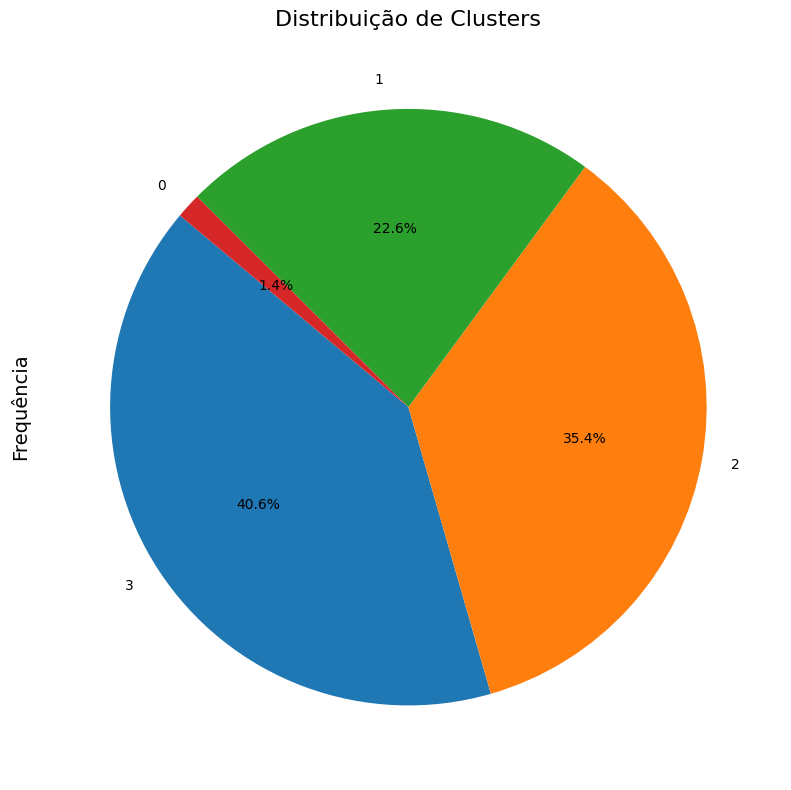

In [17]:
cluster_counts = df['Clusters'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Clusters', fontsize=16)
plt.ylabel('Frequência', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

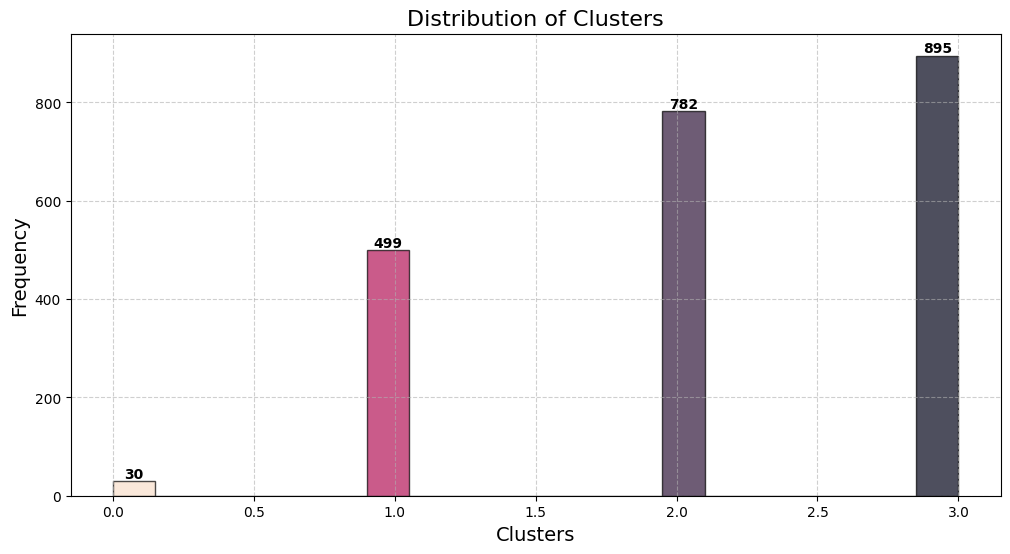

In [18]:
def plot_distribution(column):
    plt.figure(figsize=(12, 6))
    
    if pd.api.types.is_numeric_dtype(df[column]):
        # Numeric data: Plot a histogram
        n, bins, patches = plt.hist(df[column], bins=20, color='blue', alpha=0.7, edgecolor='black')
        for i in range(len(patches)):
            patches[i].set_facecolor(sns.color_palette("rocket_r", as_cmap=True)(n[i] / max(n)))
            if n[i] > 0:
                plt.text(patches[i].get_x() + patches[i].get_width() / 2, n[i], int(n[i]), 
                         ha='center', va='bottom', fontsize=10, fontweight='bold')
        plt.title(f'Distribution of {column}', fontsize=16)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
    
    else:
        # Categorical data: Plot a bar chart
        value_counts = df[column].value_counts()
        bars = plt.bar(value_counts.index, value_counts.values, color='blue', alpha=0.7, edgecolor='black')
        for i, bar in enumerate(bars):
            bar.set_facecolor(sns.color_palette("rocket_r", as_cmap=True)(value_counts.values[i] / max(value_counts.values)))
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()), 
                     ha='center', va='bottom', fontsize=10, fontweight='bold')
        plt.title(f'Distribution of {column}', fontsize=16)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
    
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

plot_distribution('Clusters')

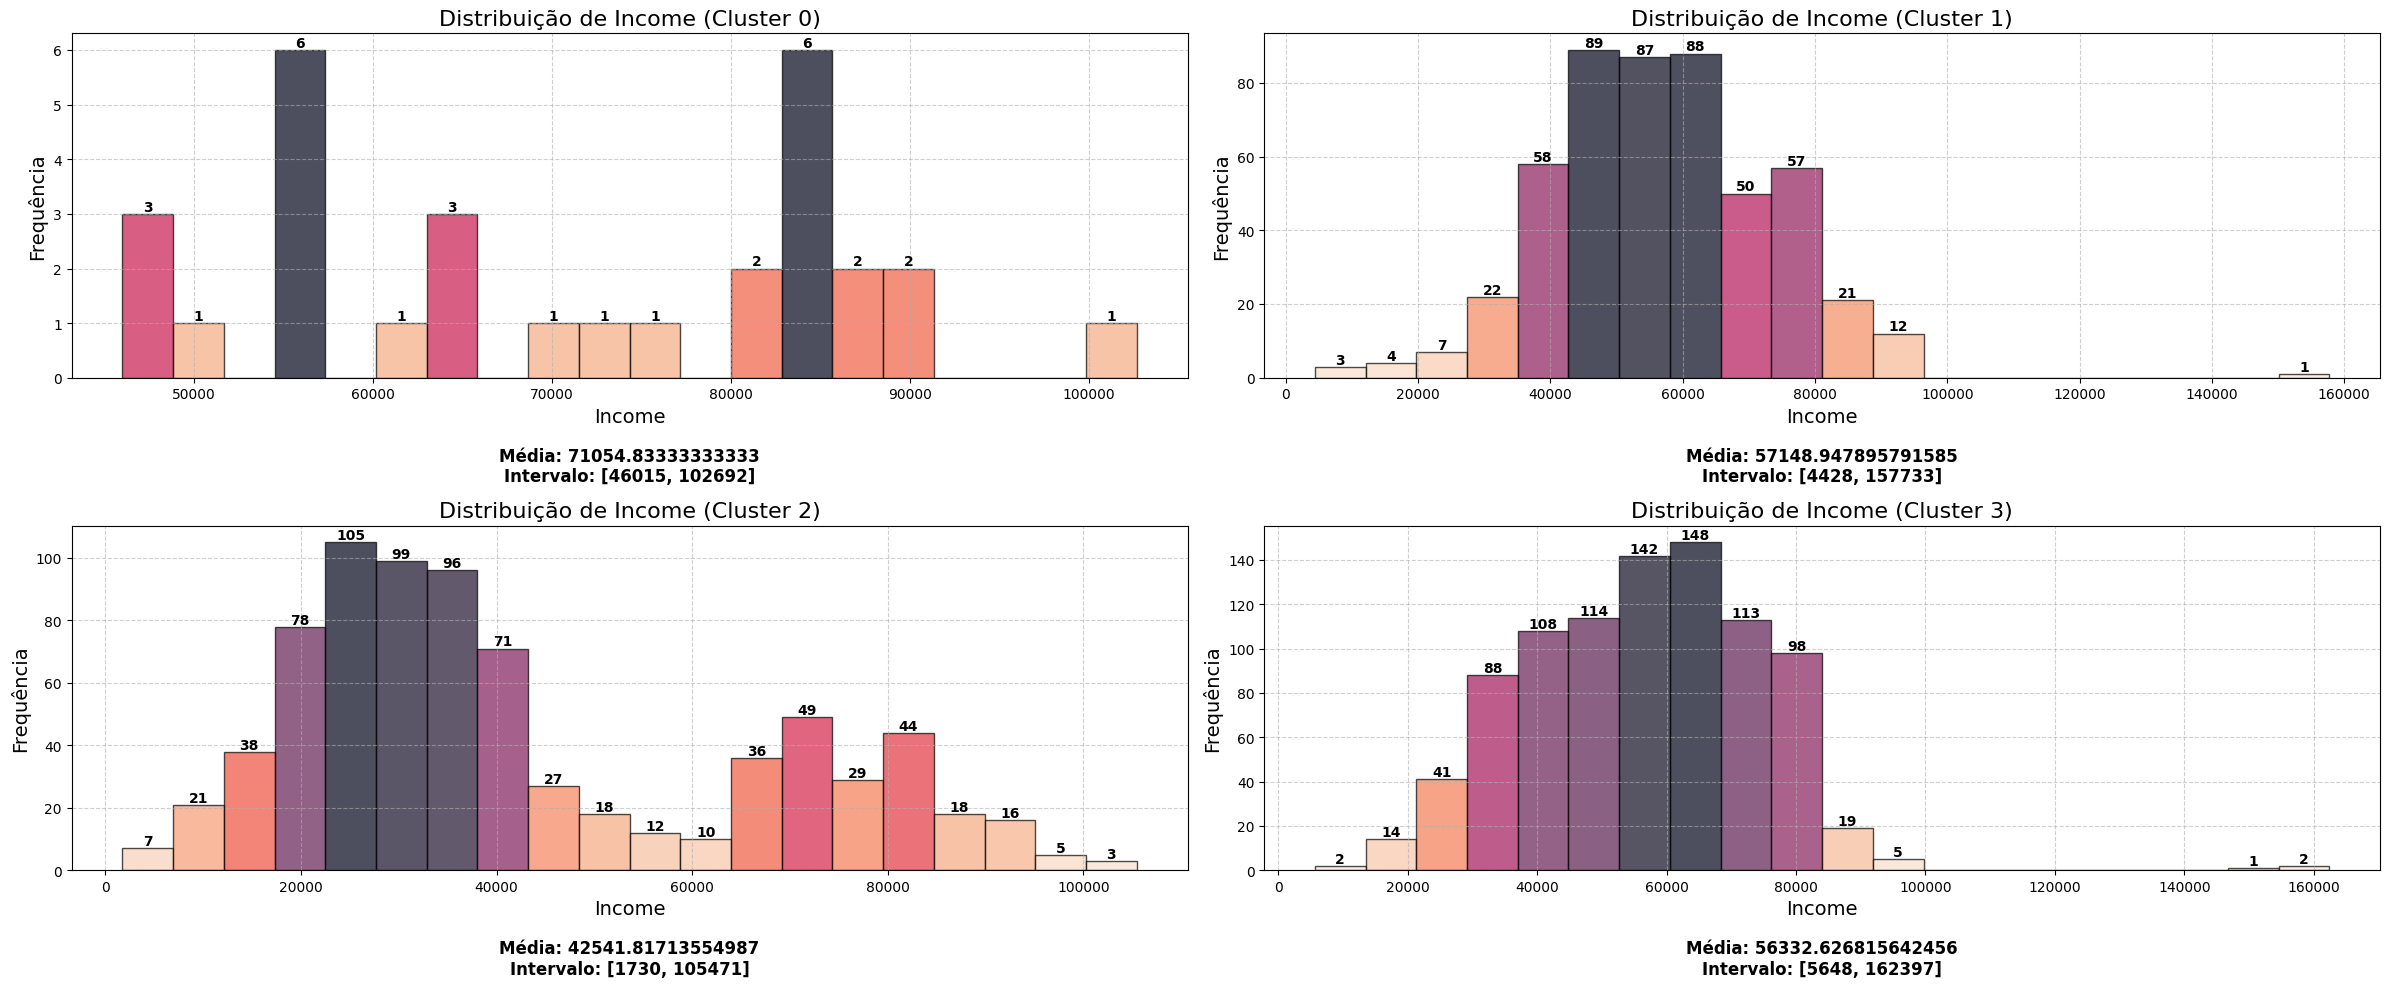

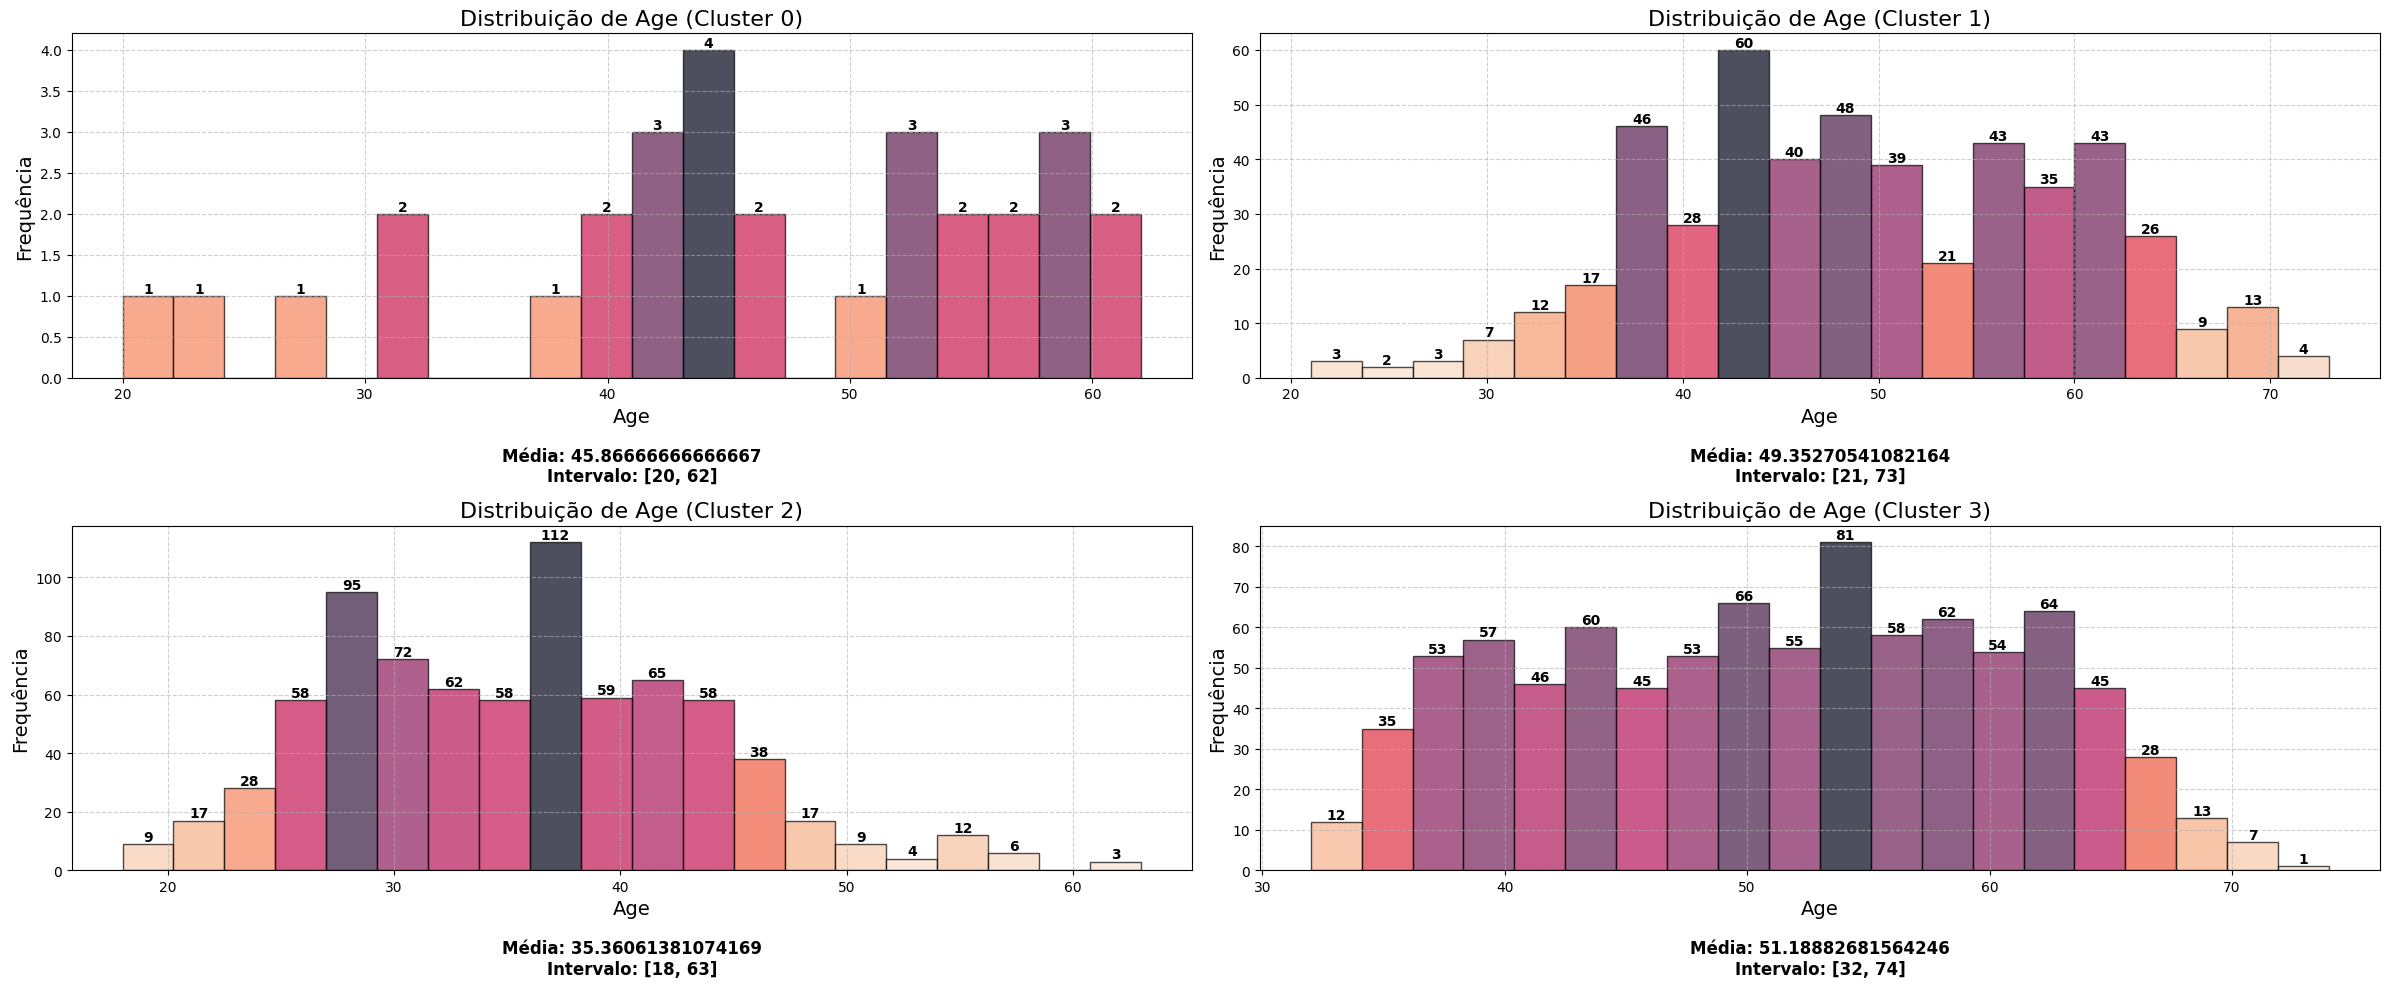

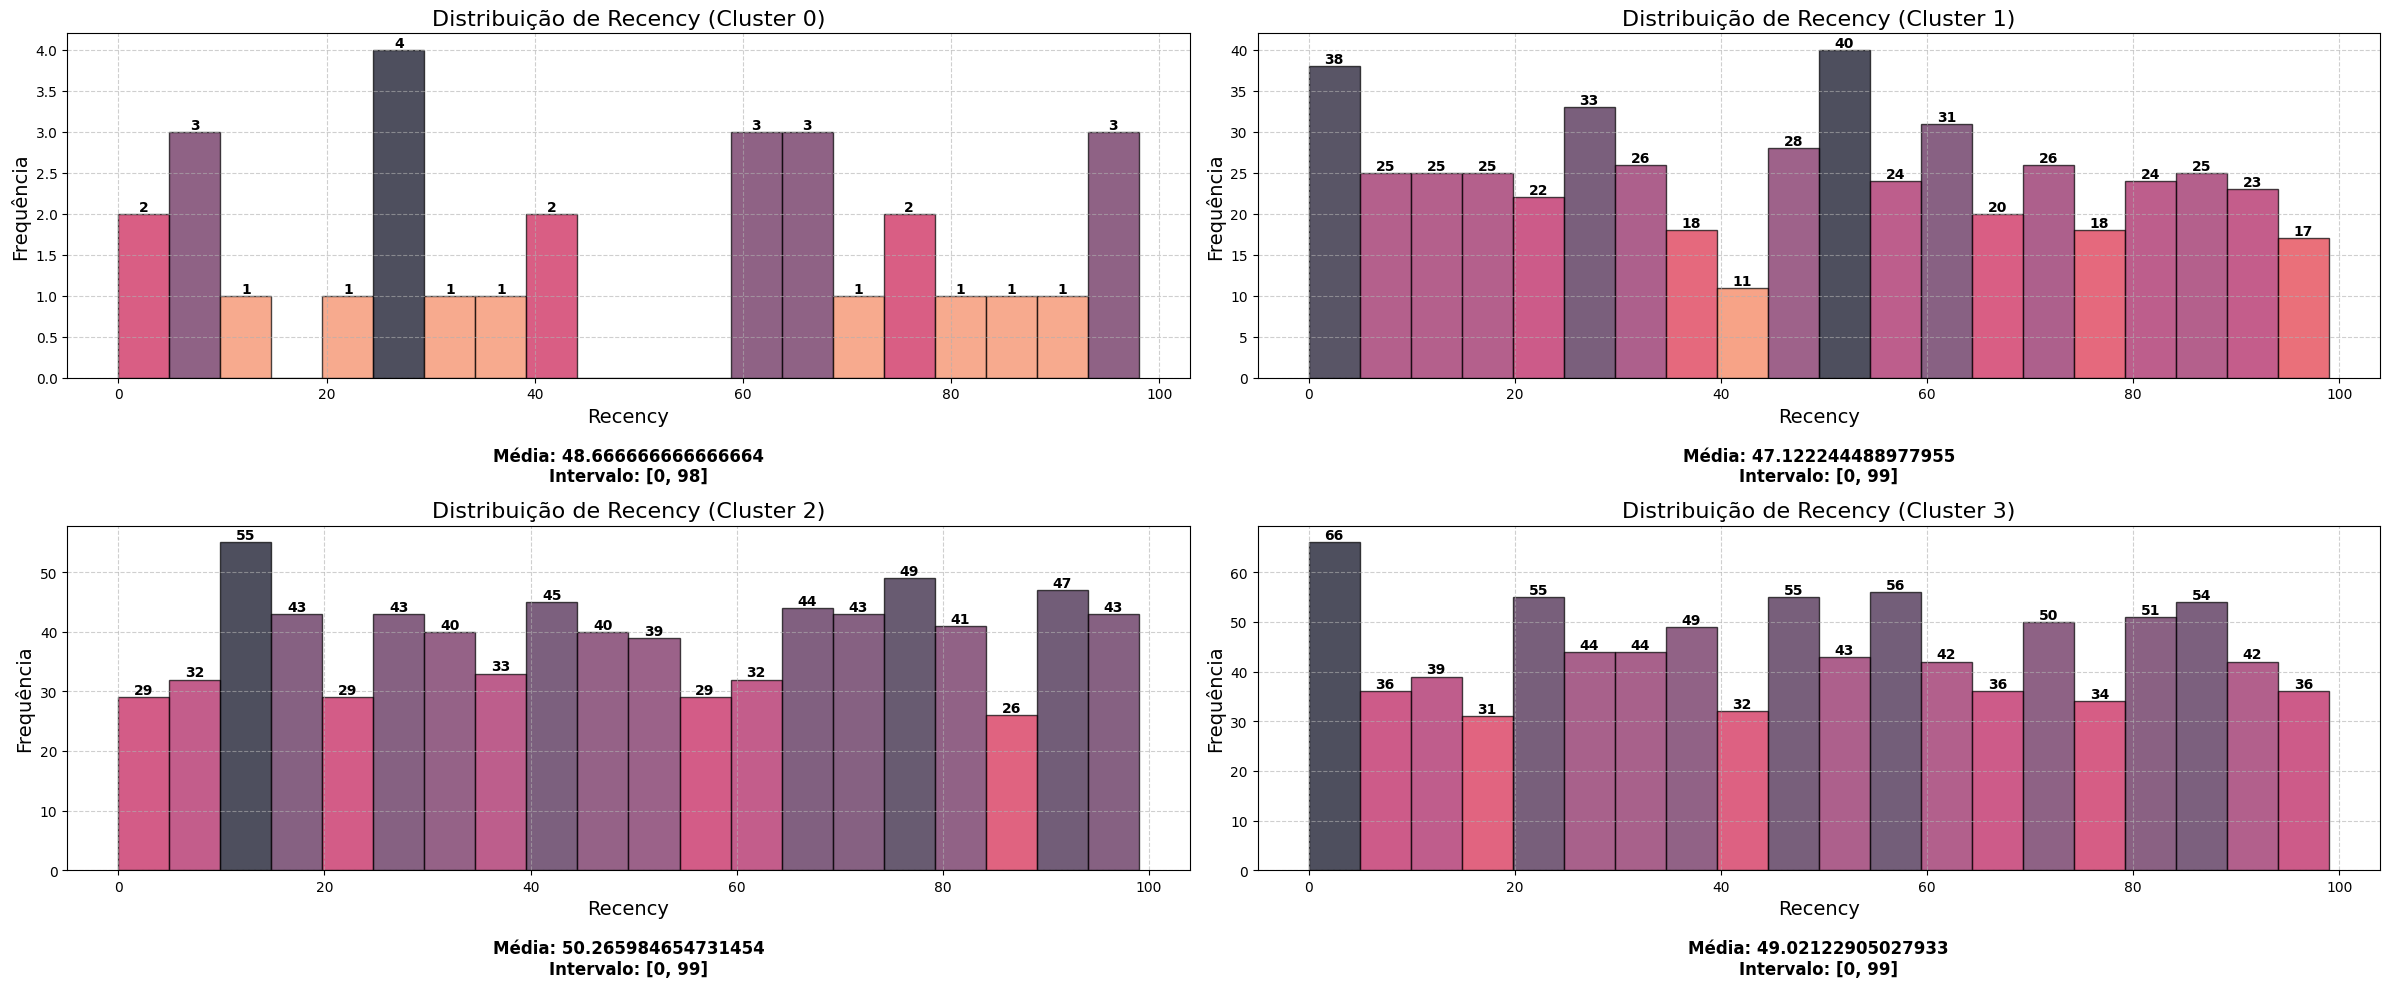

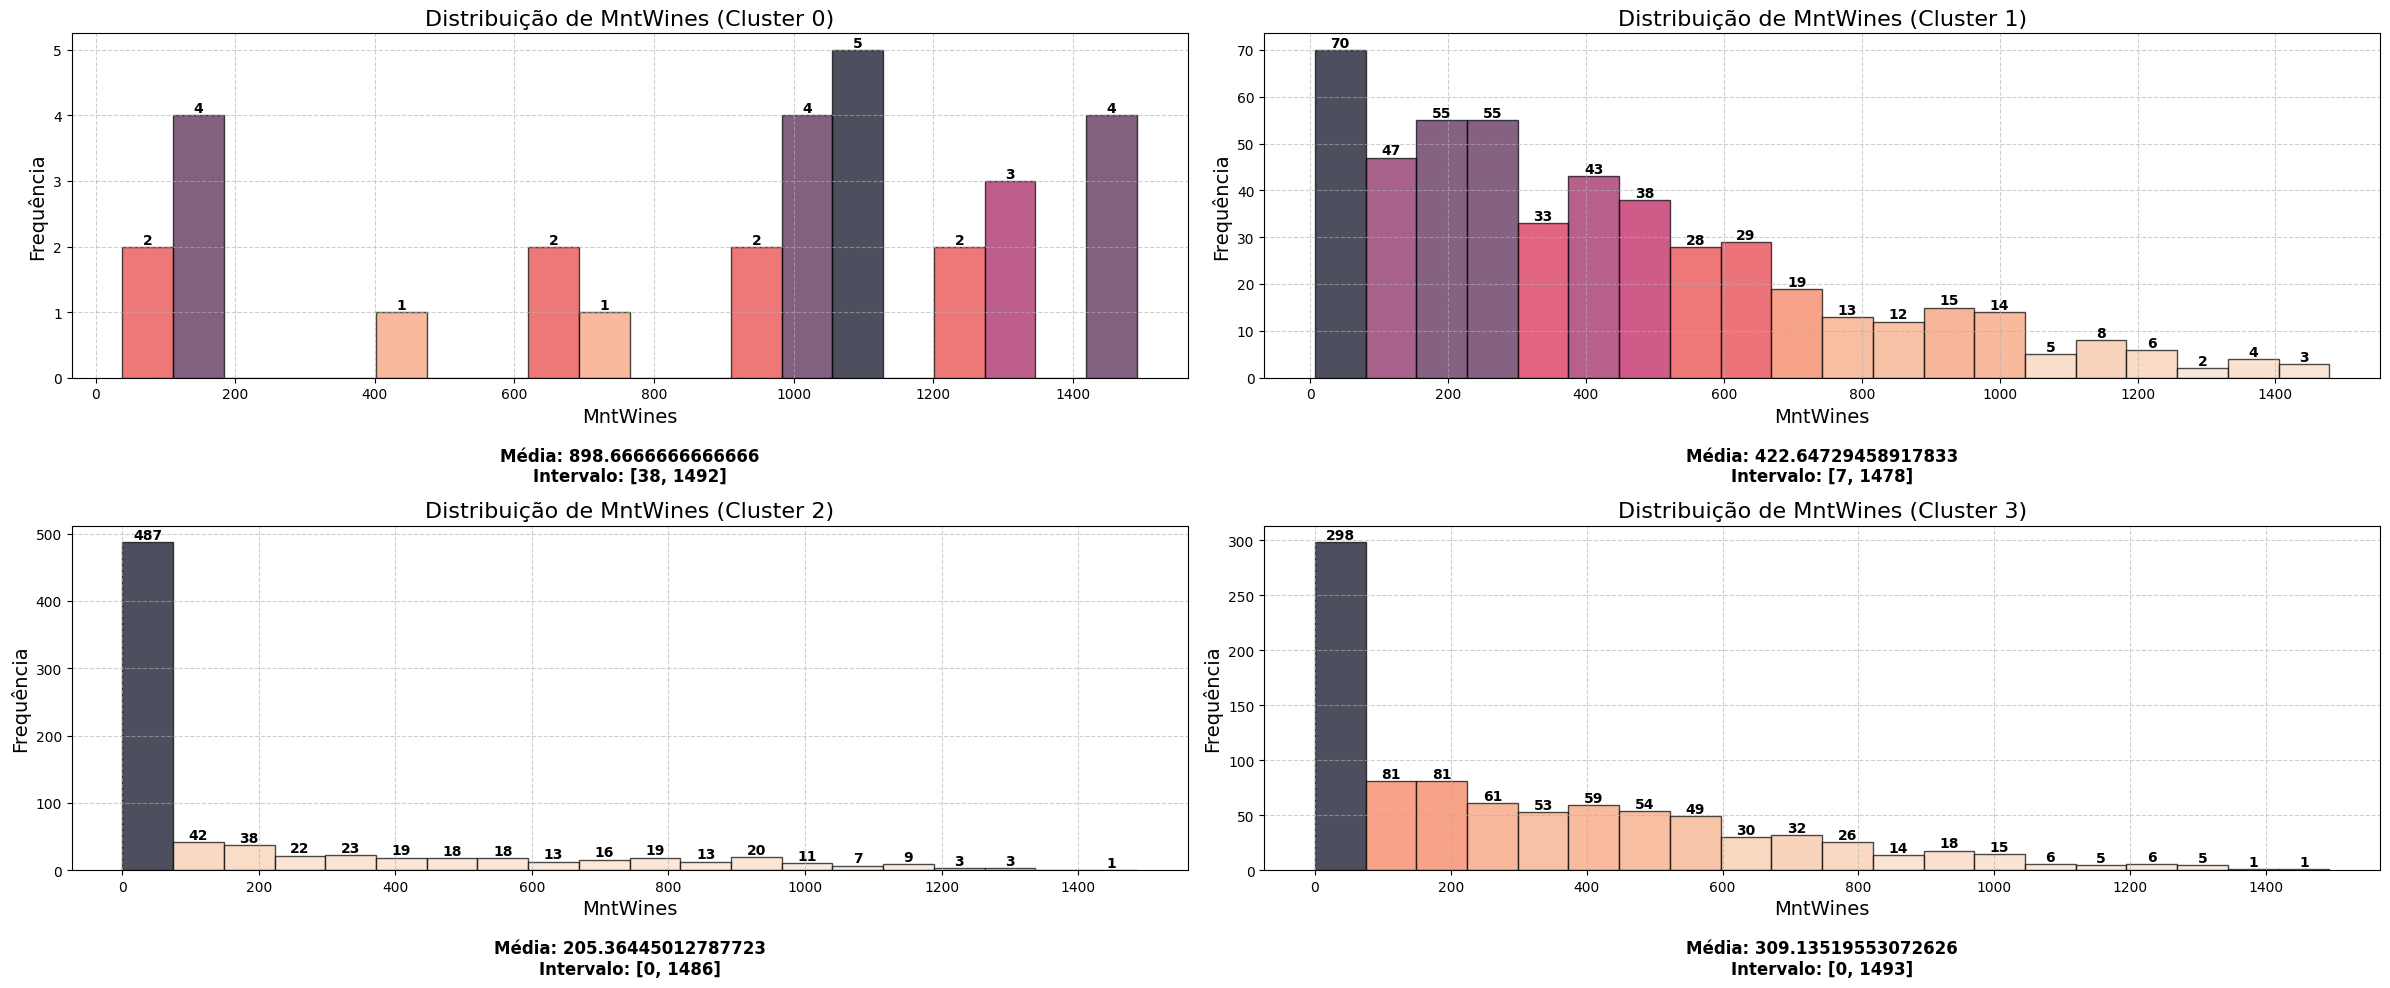

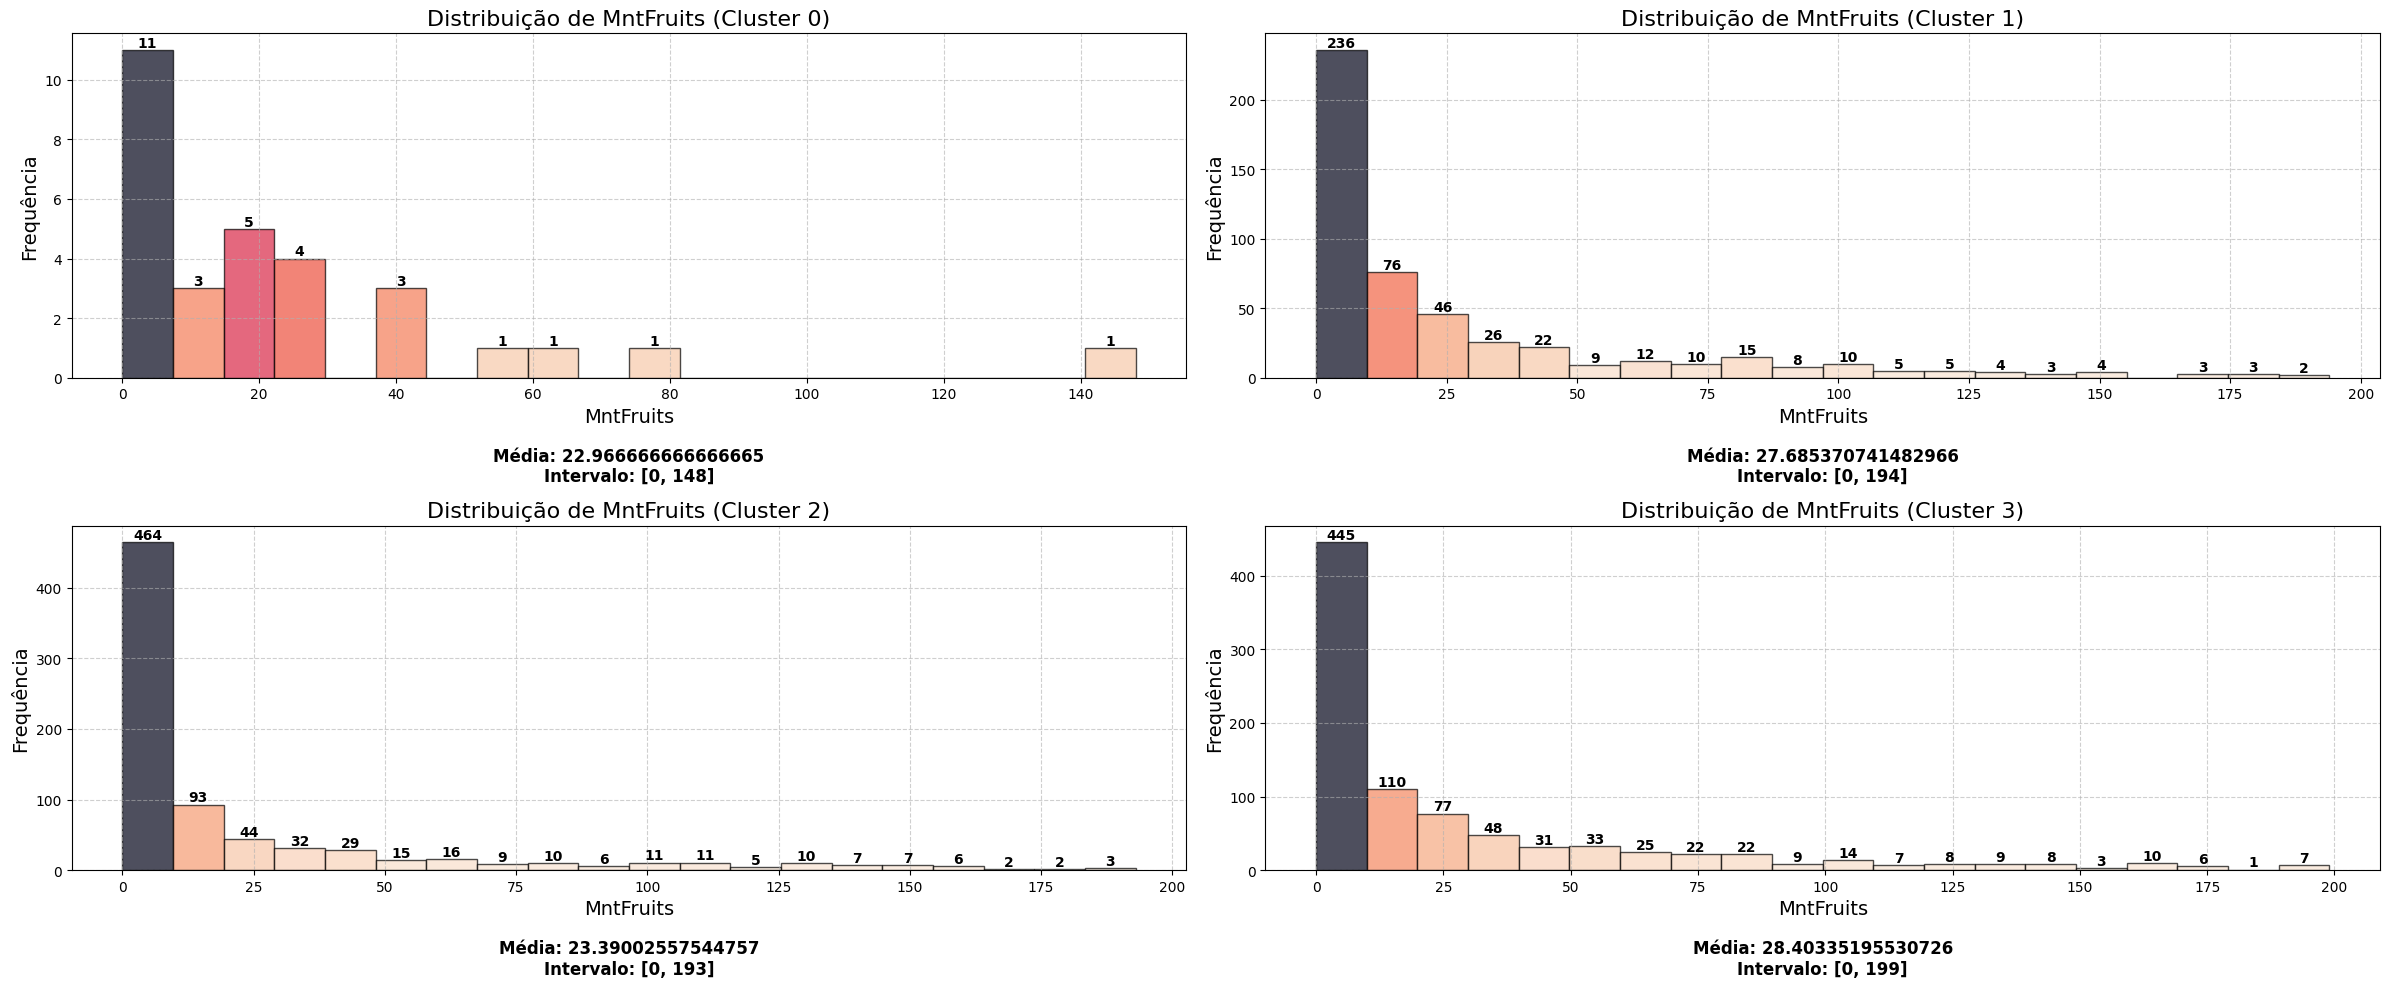

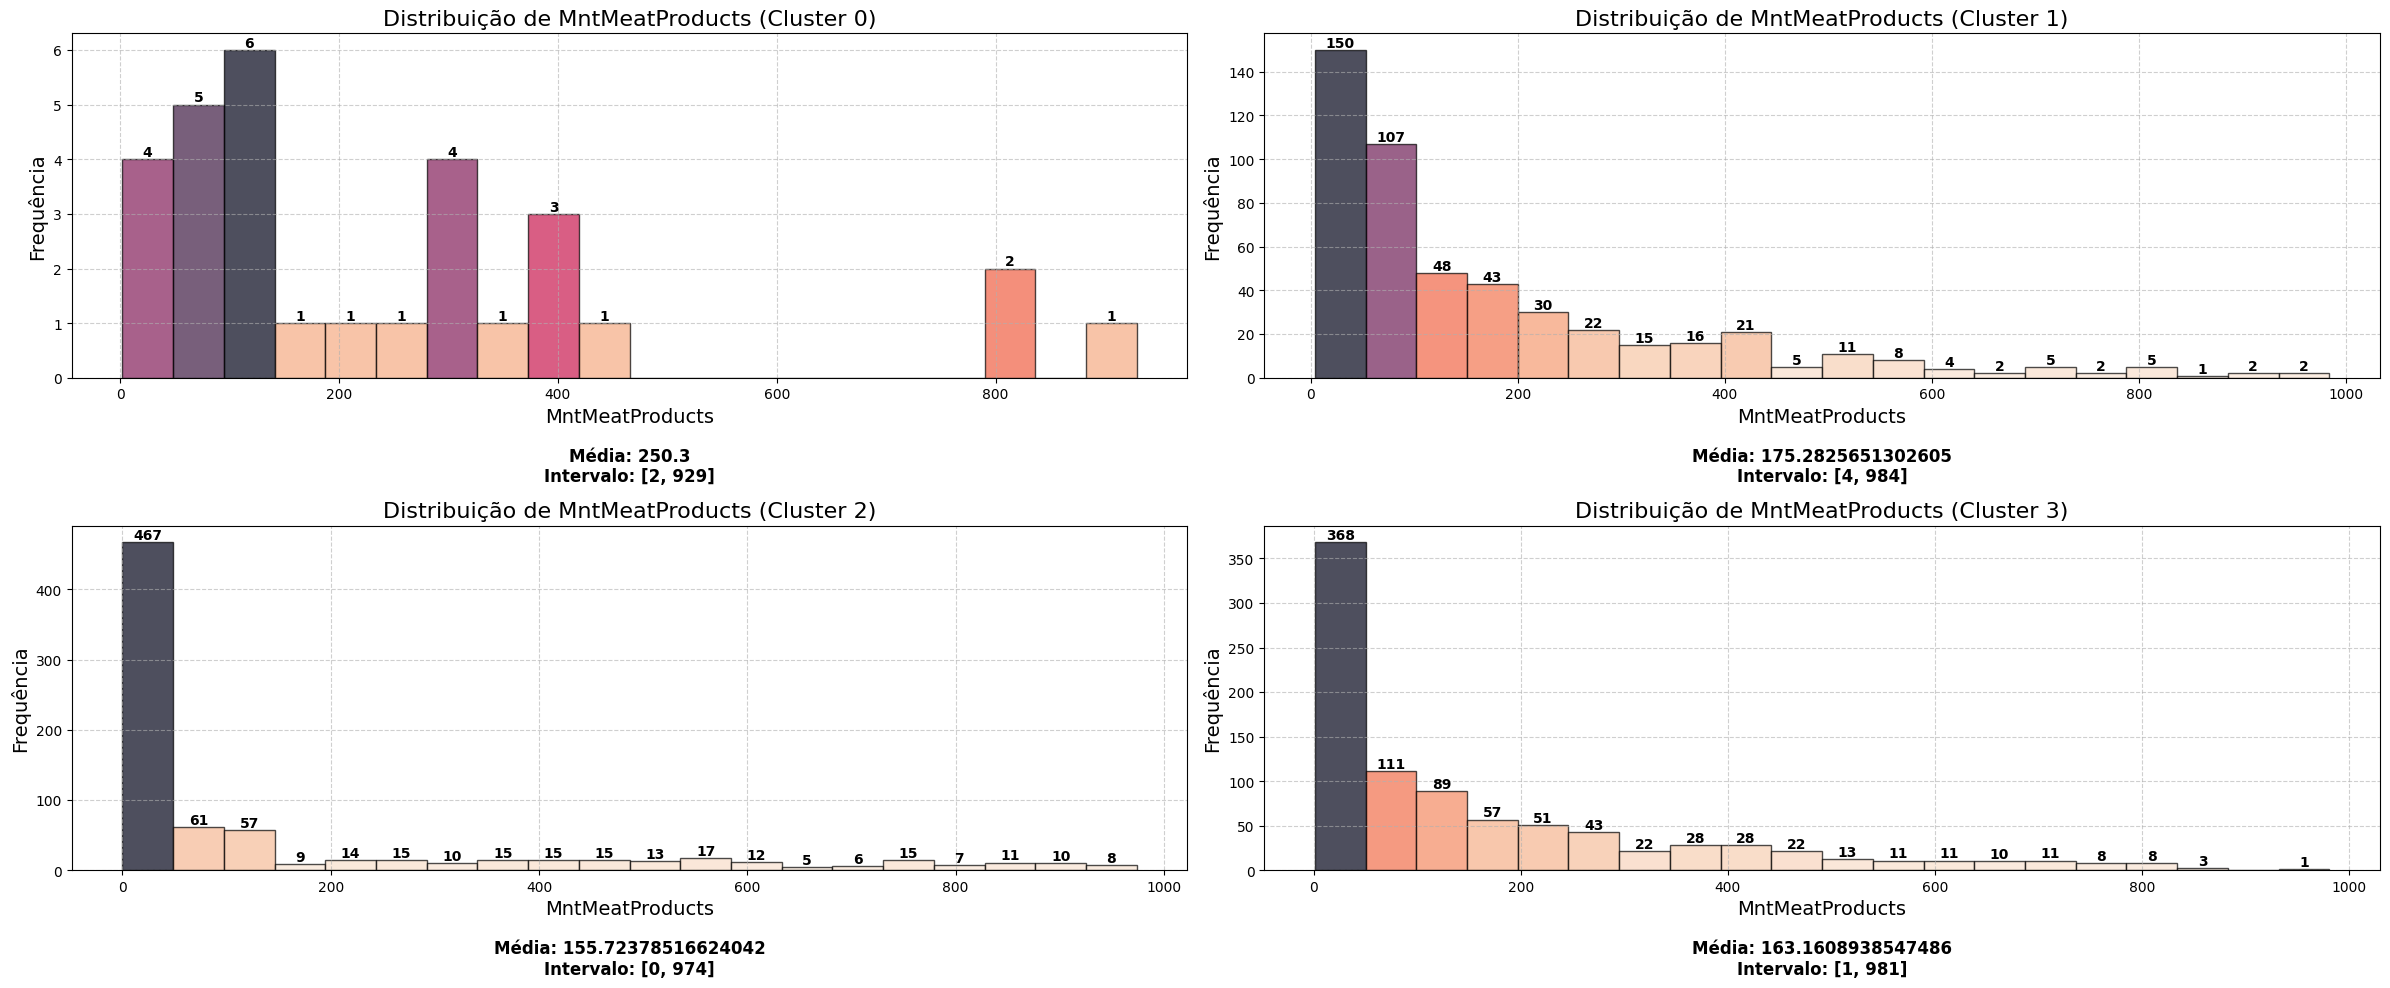

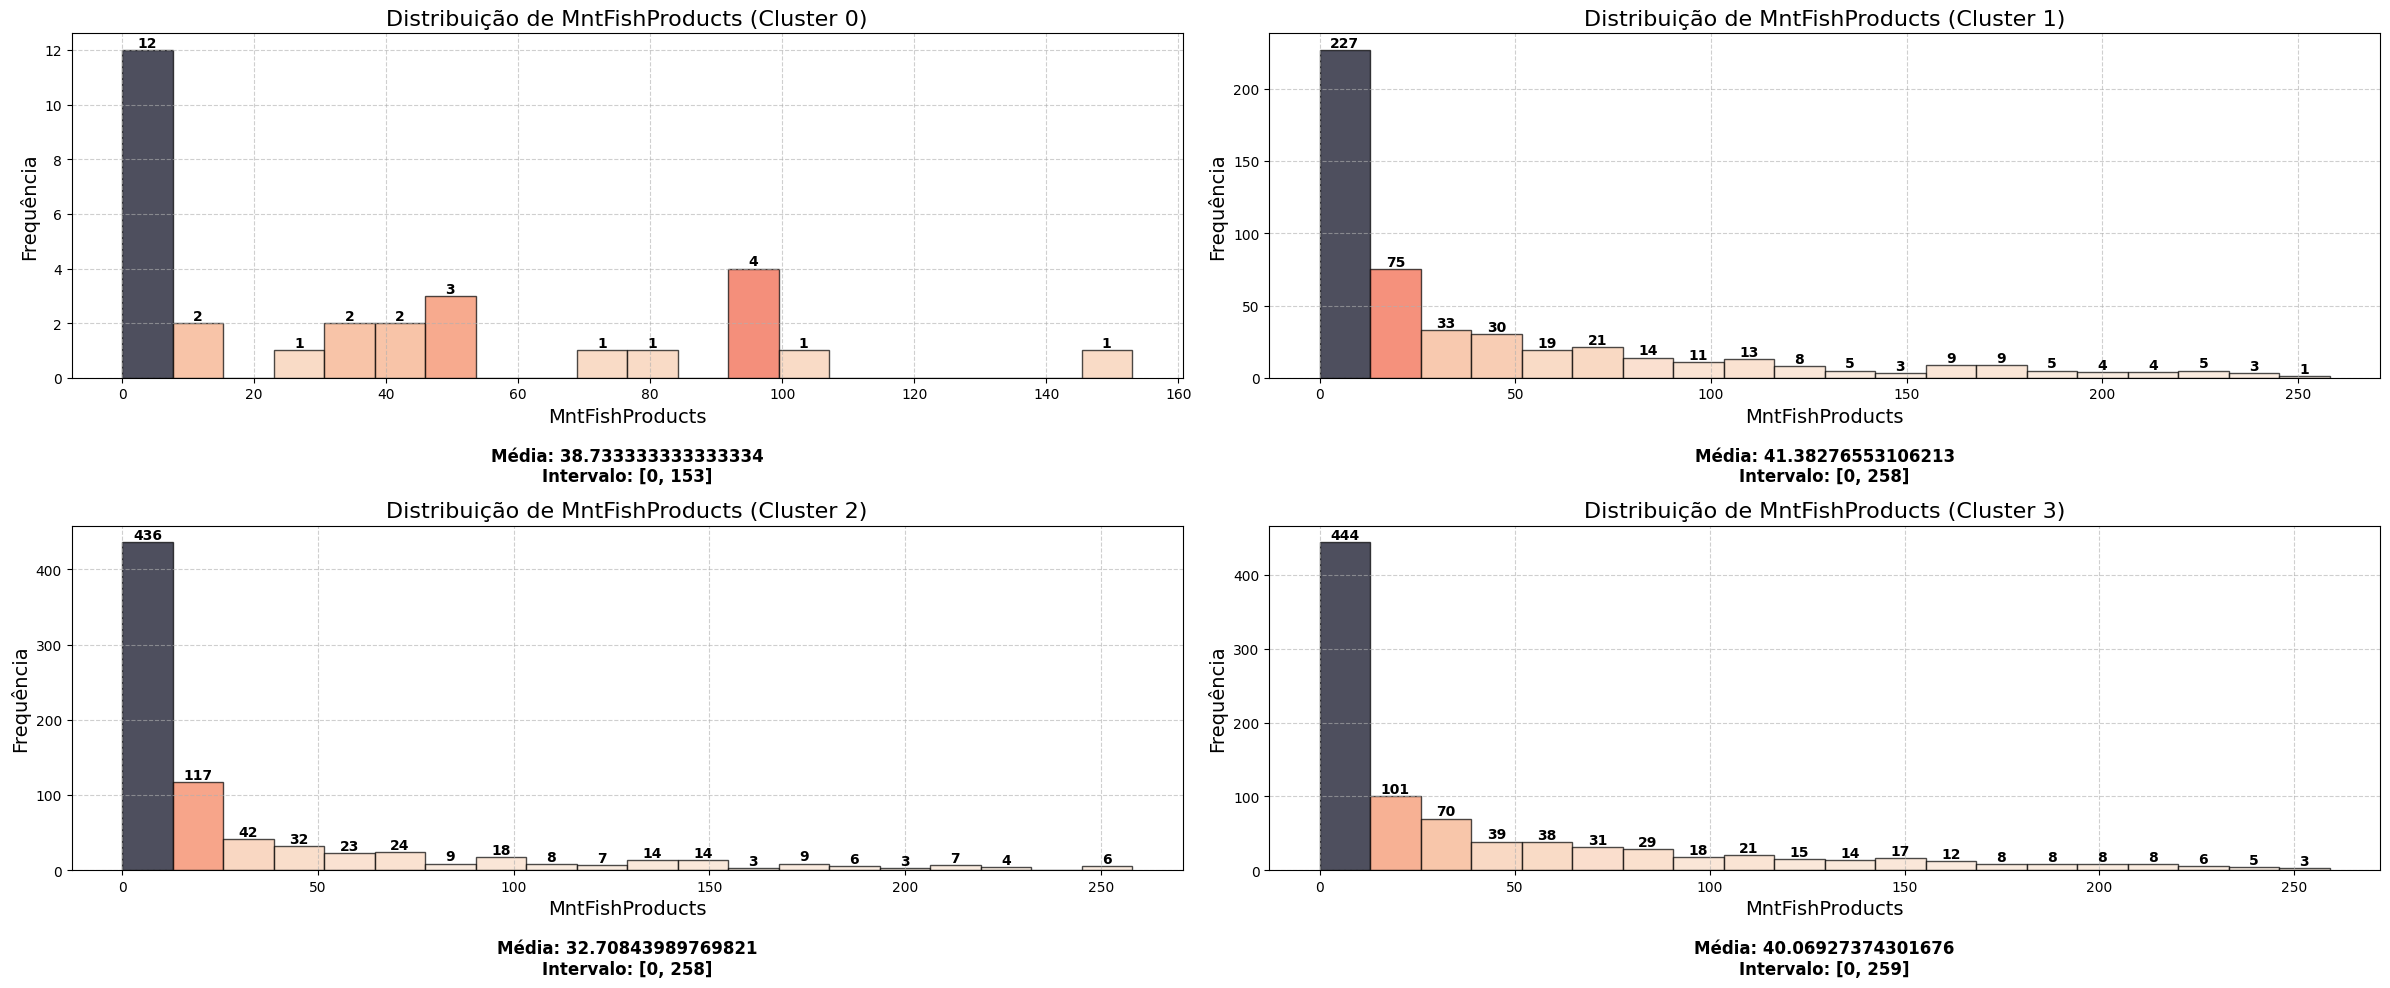

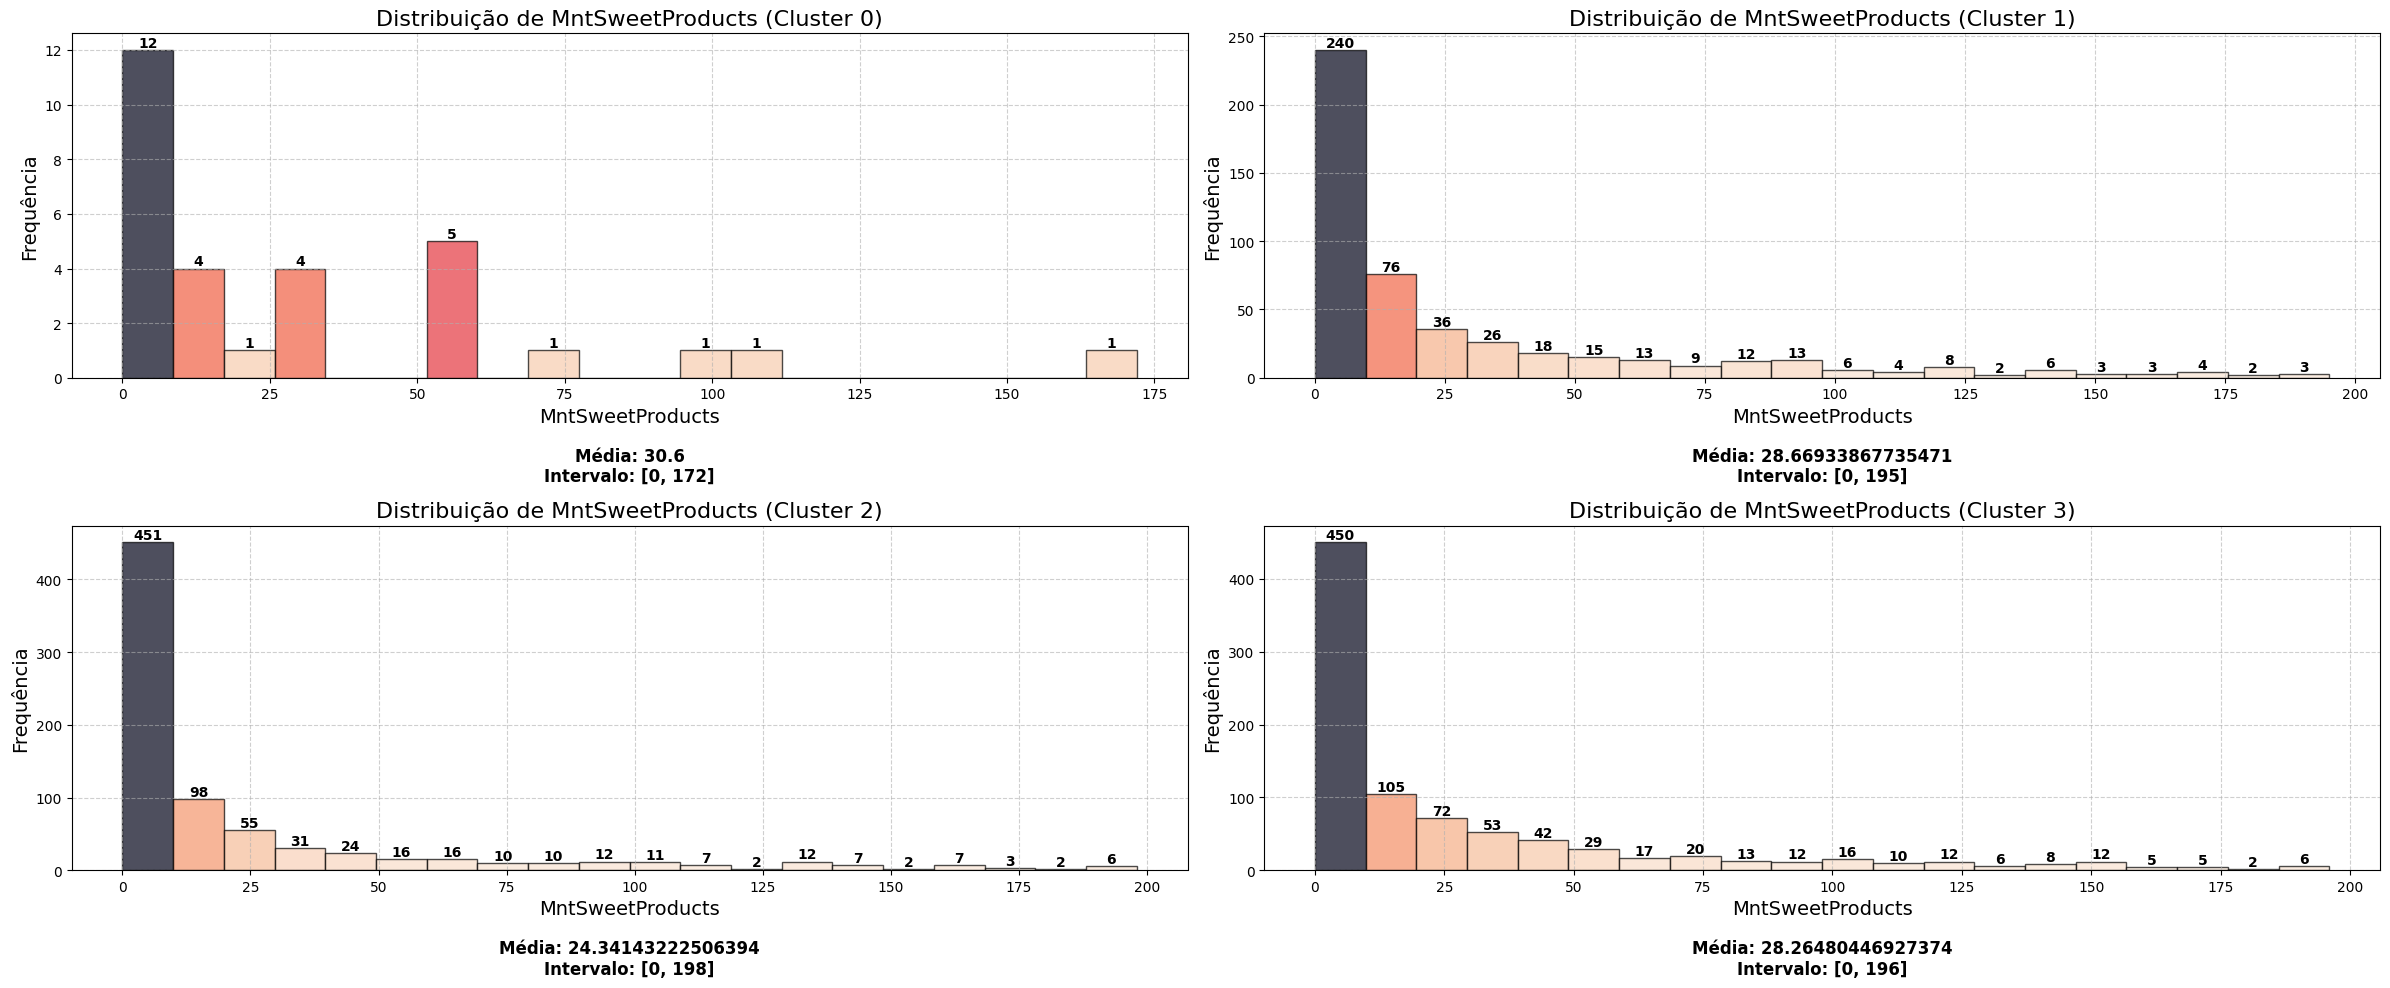

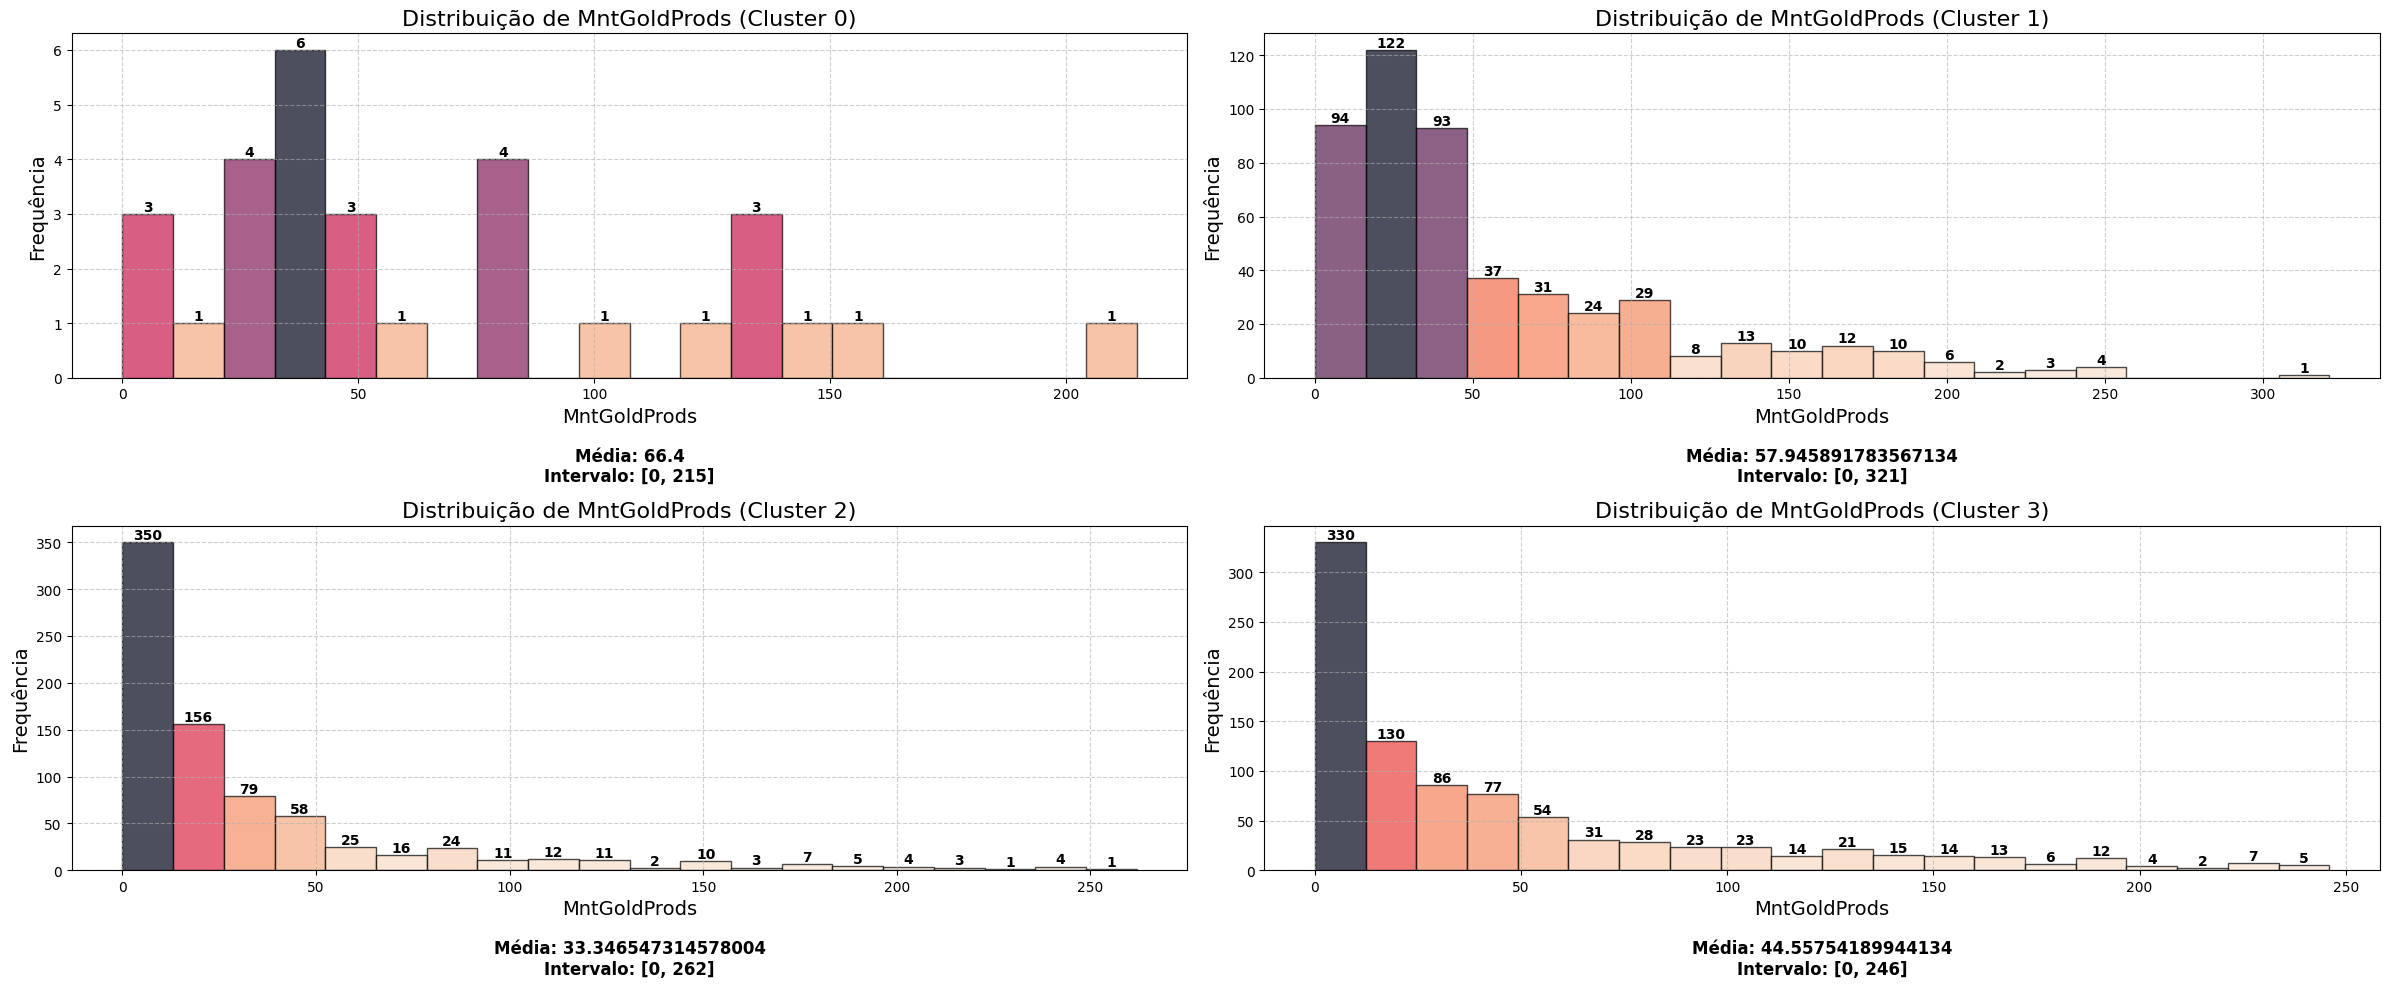

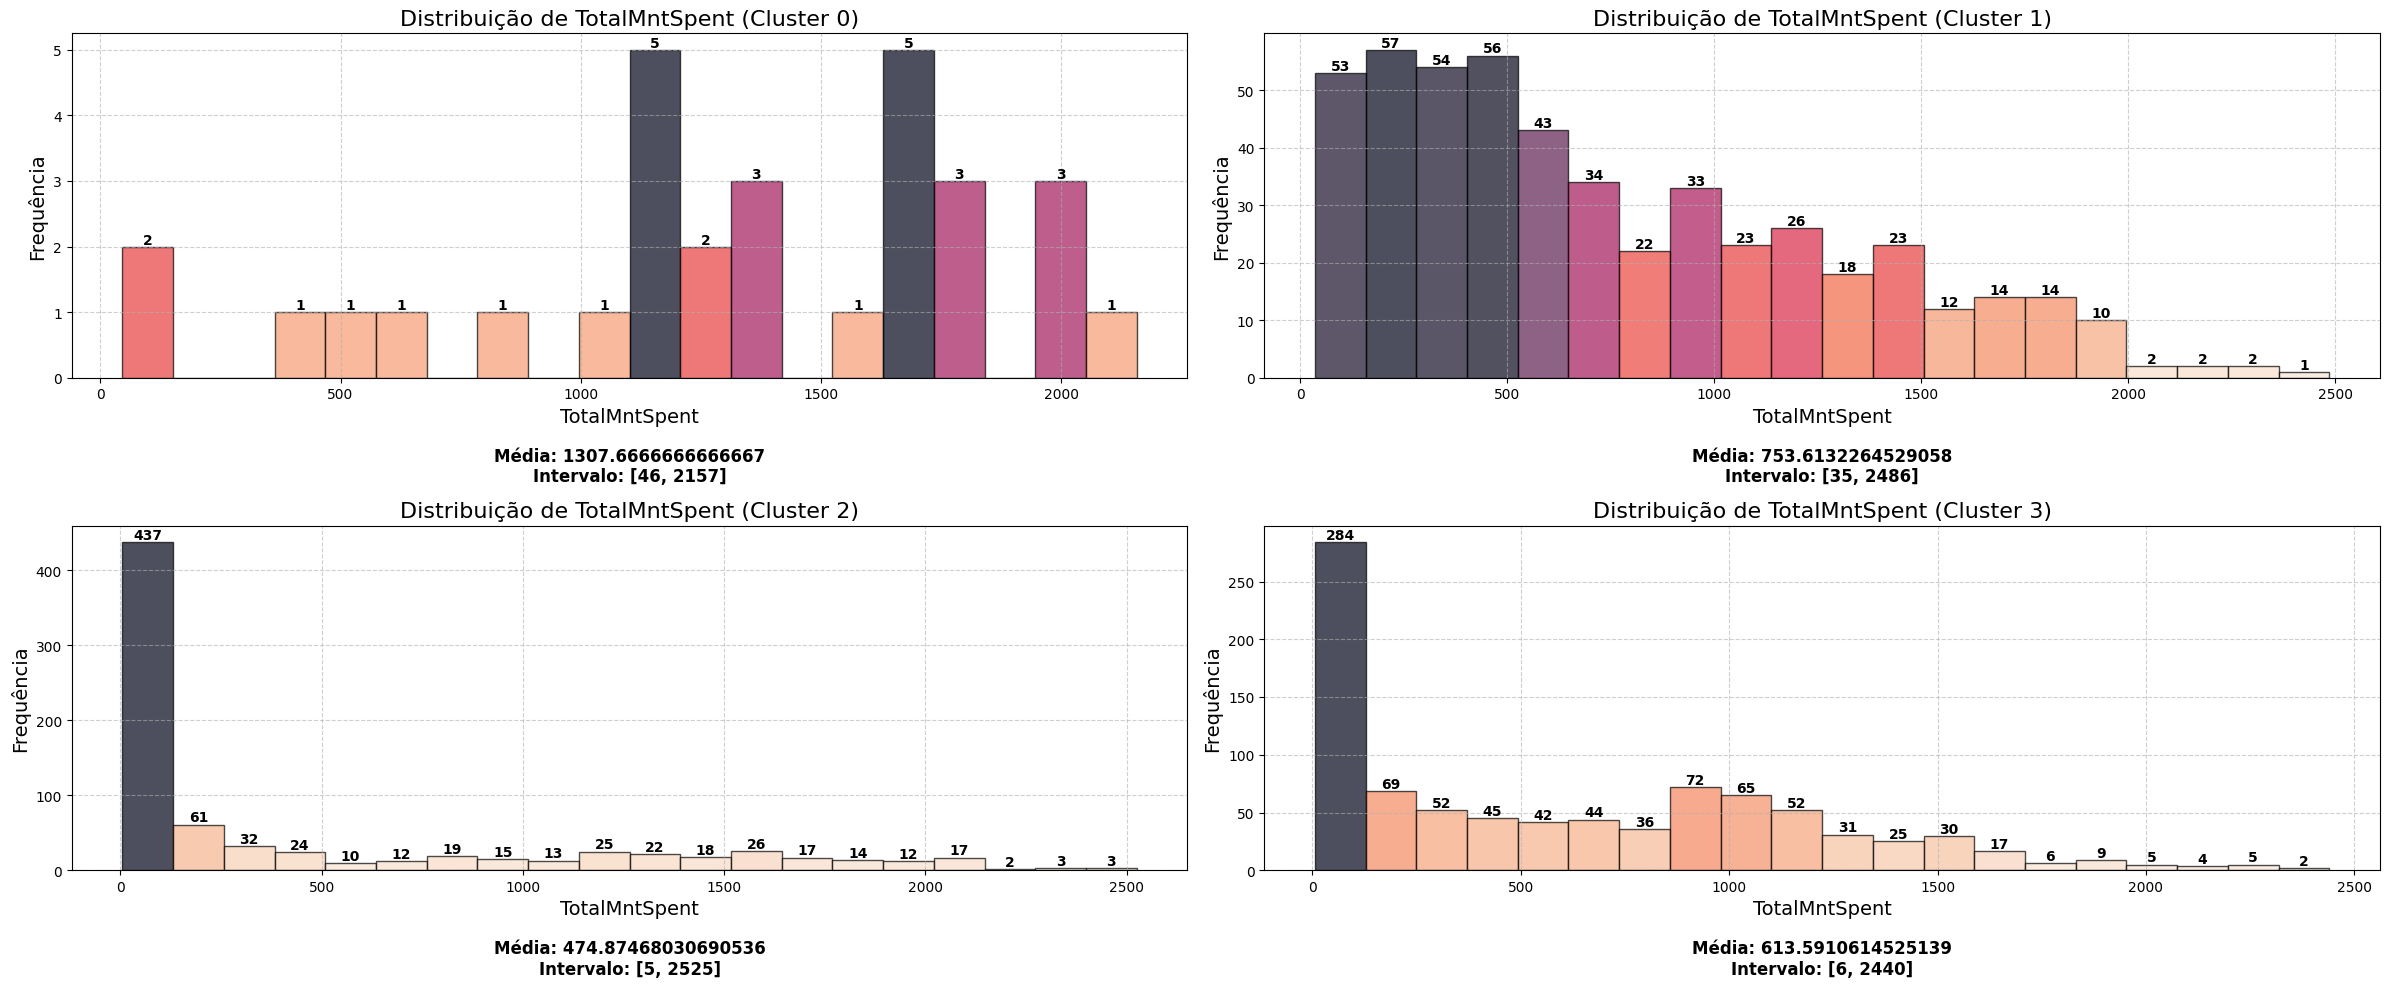

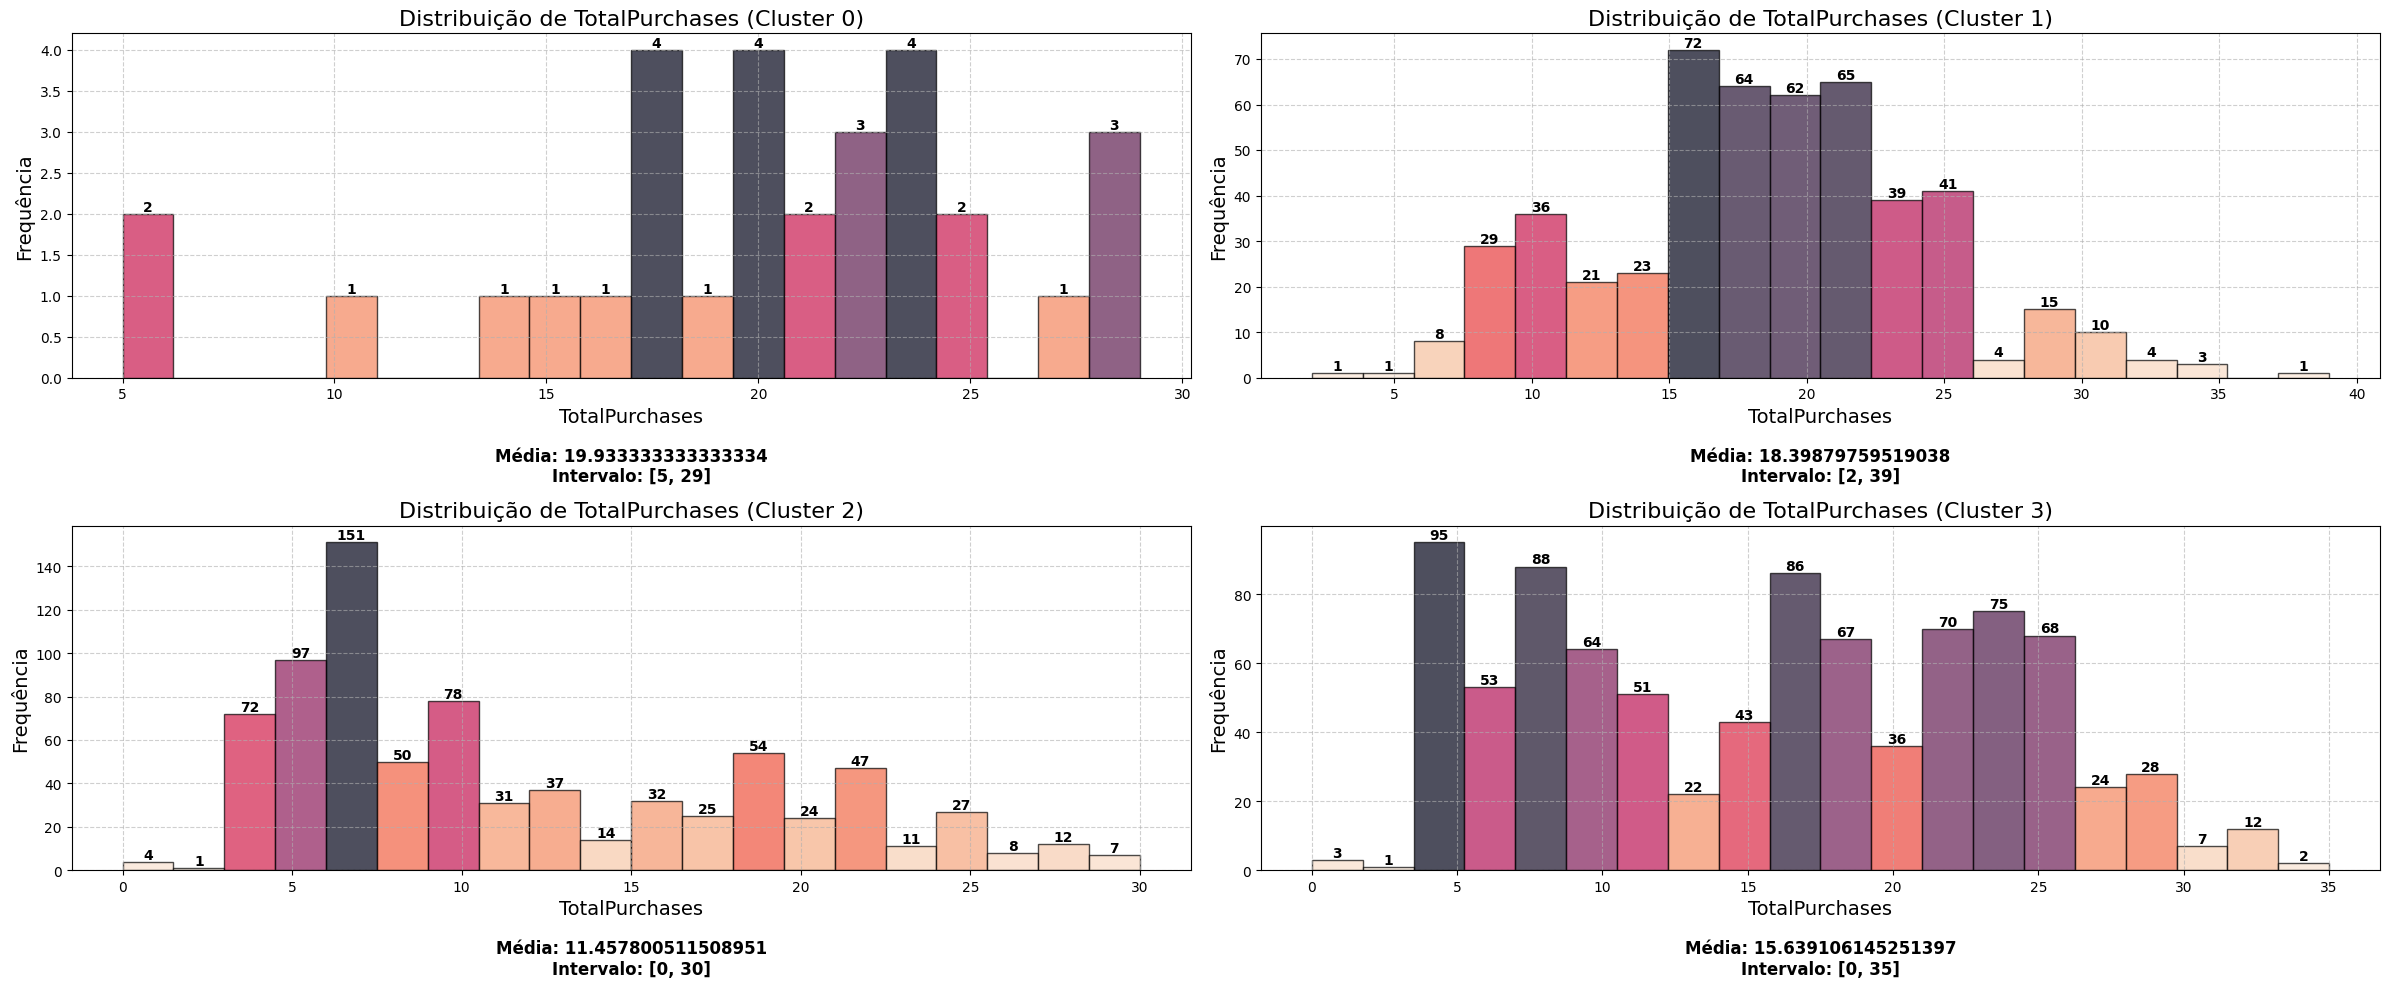

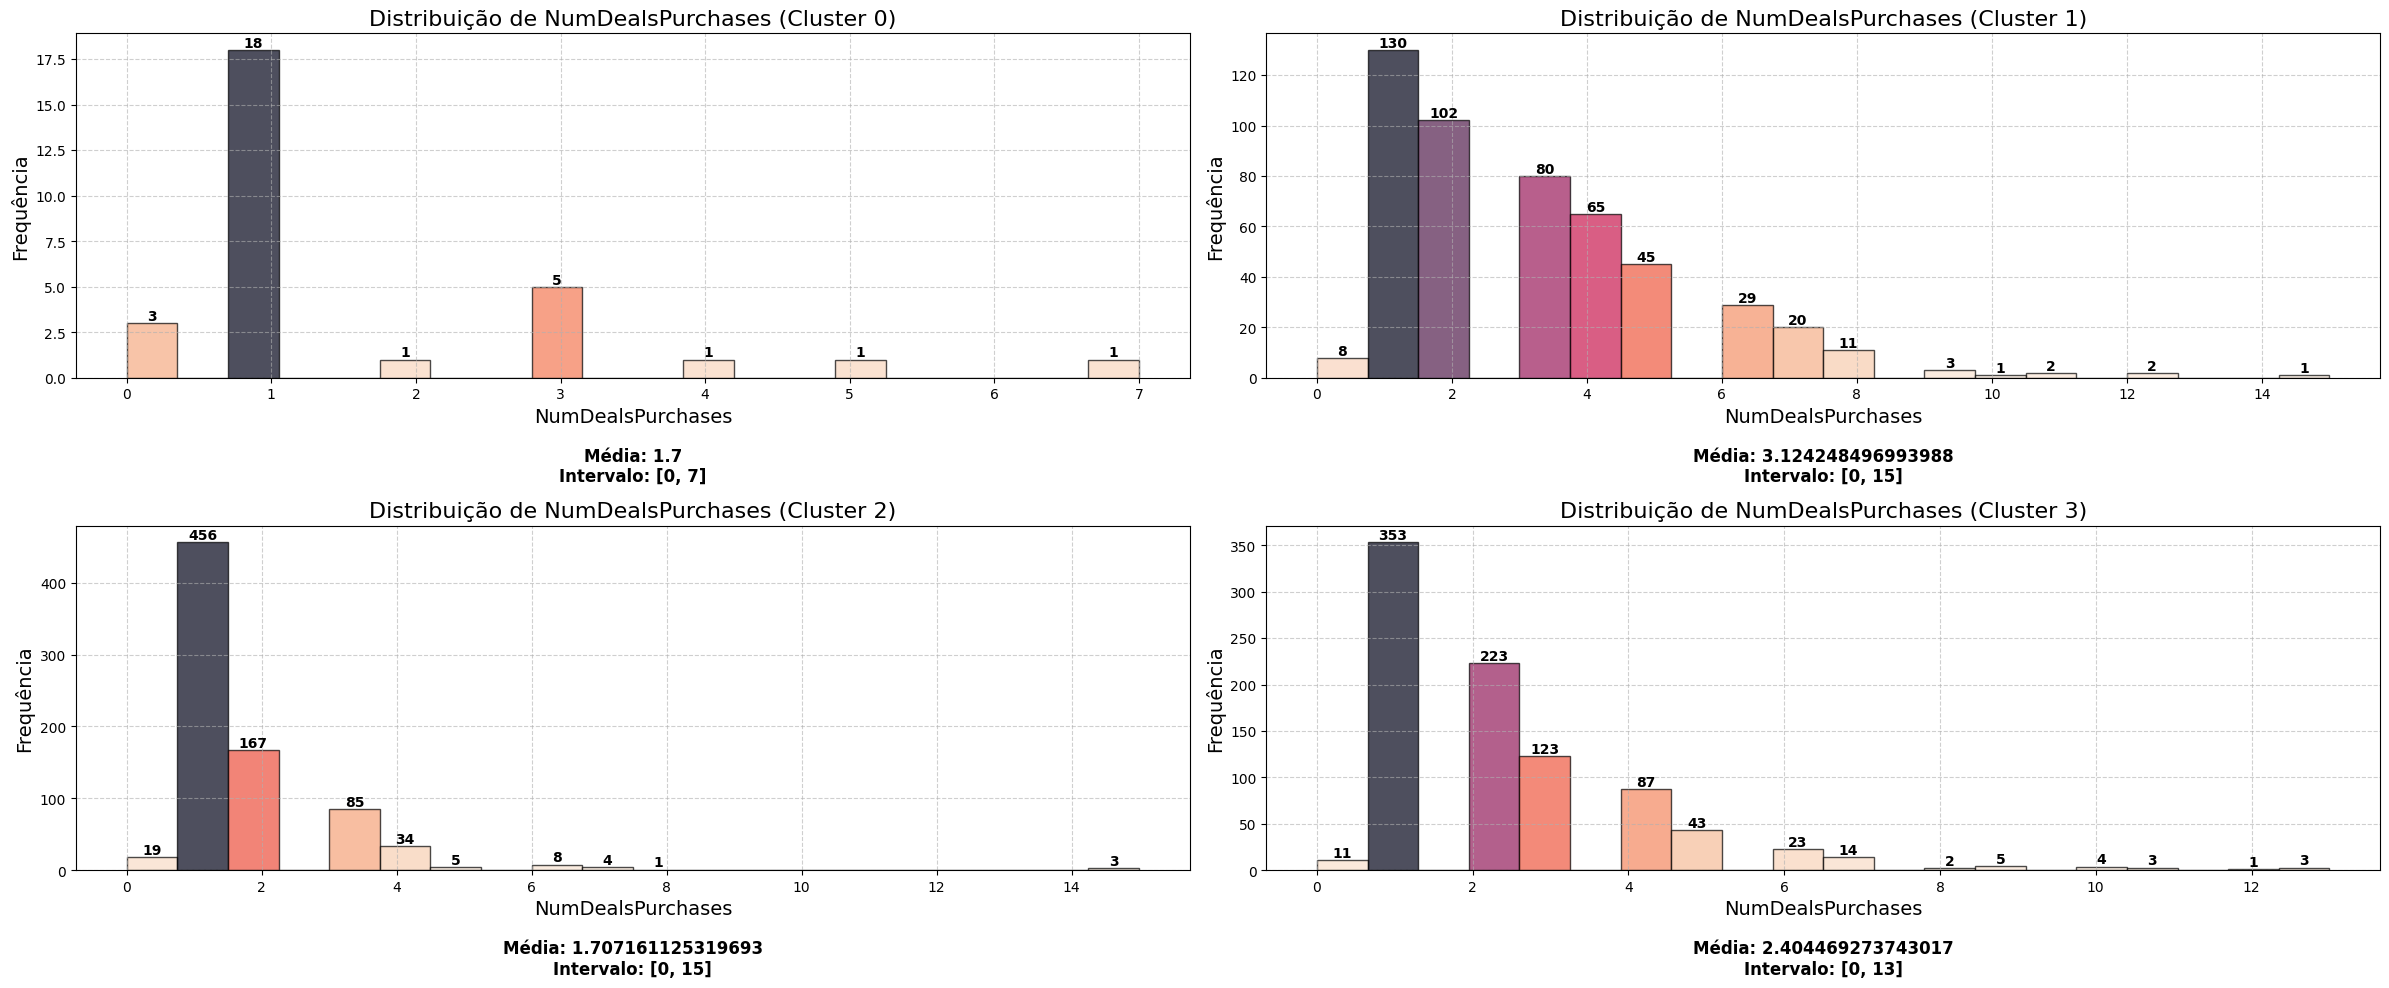

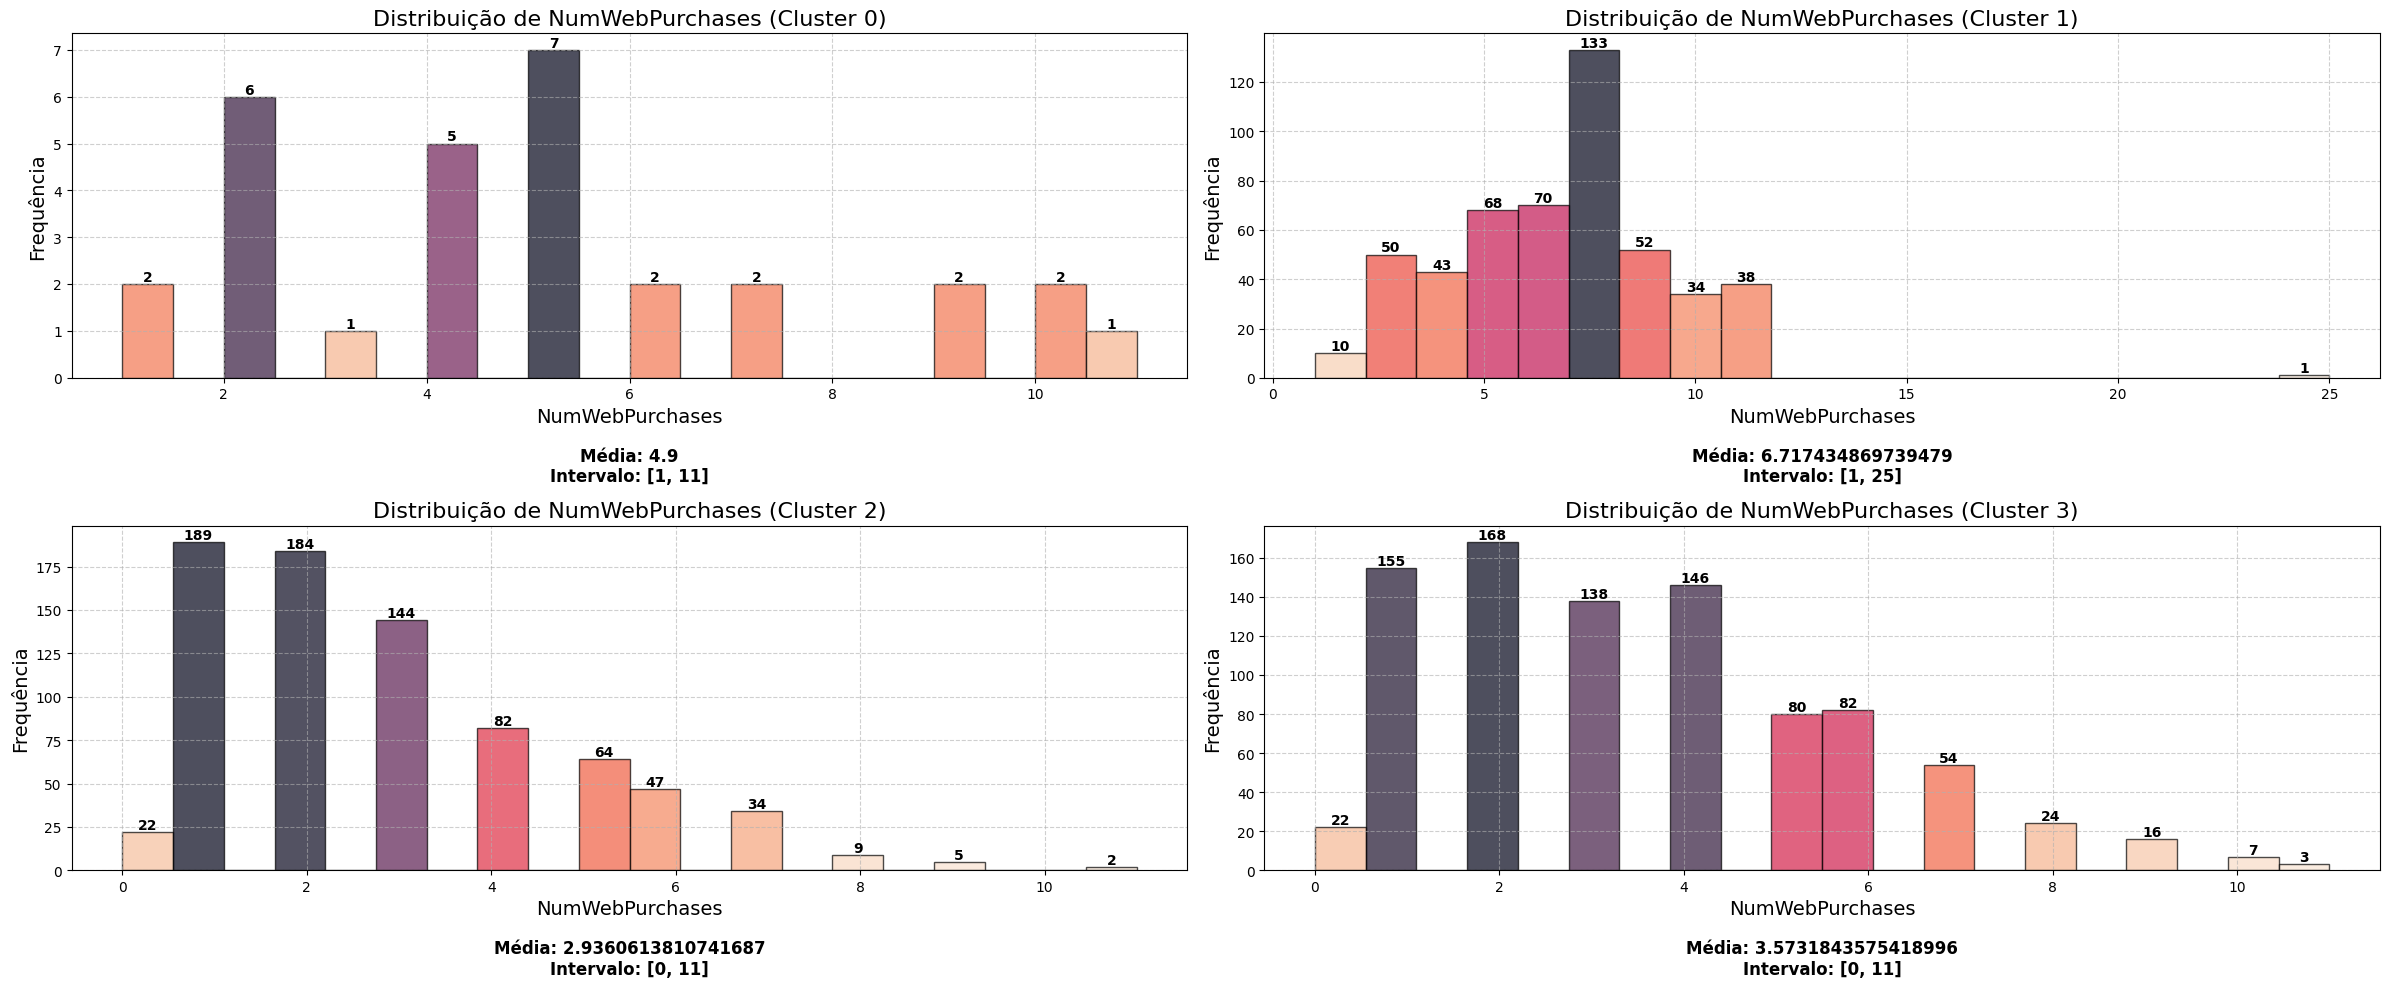

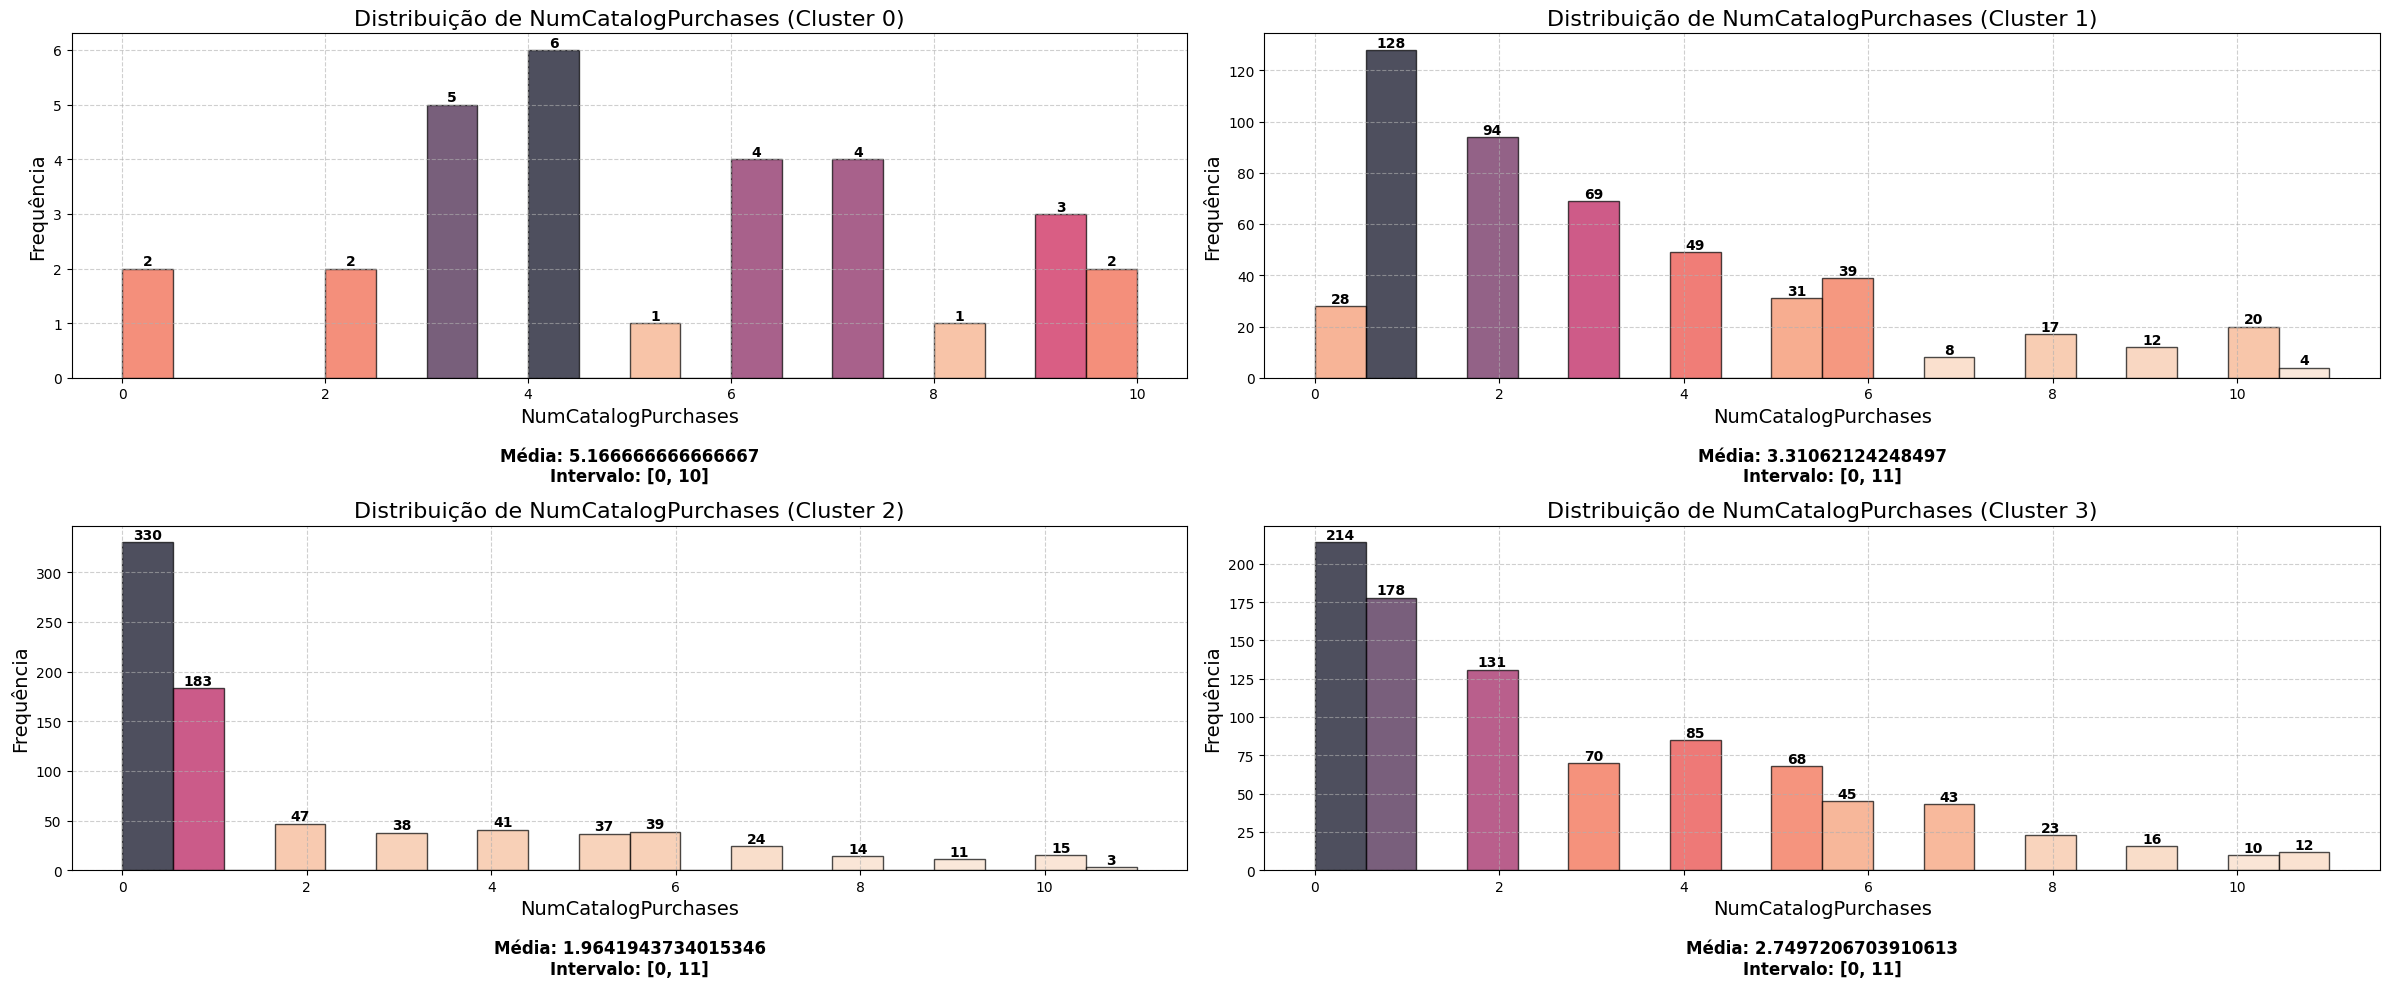

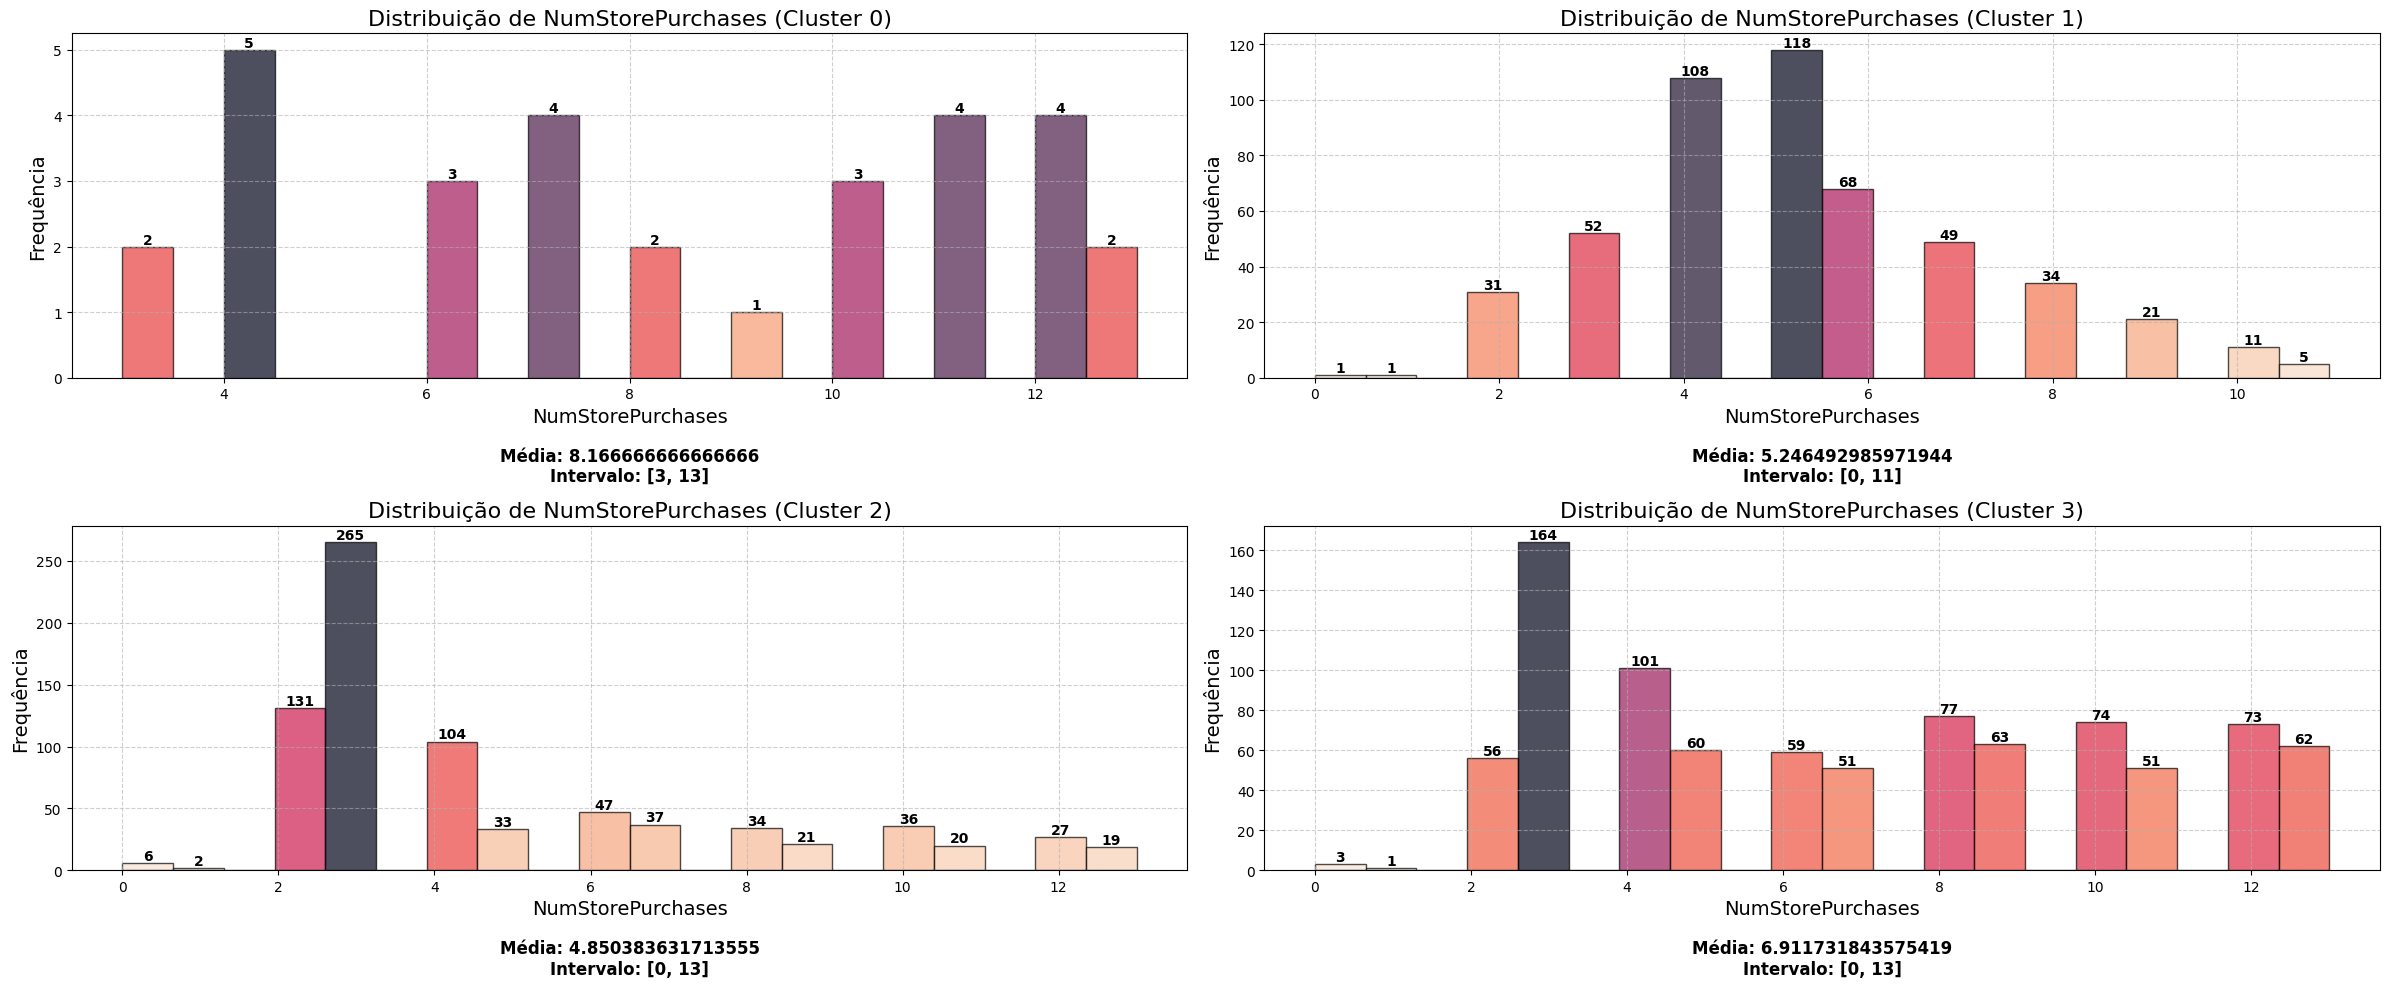

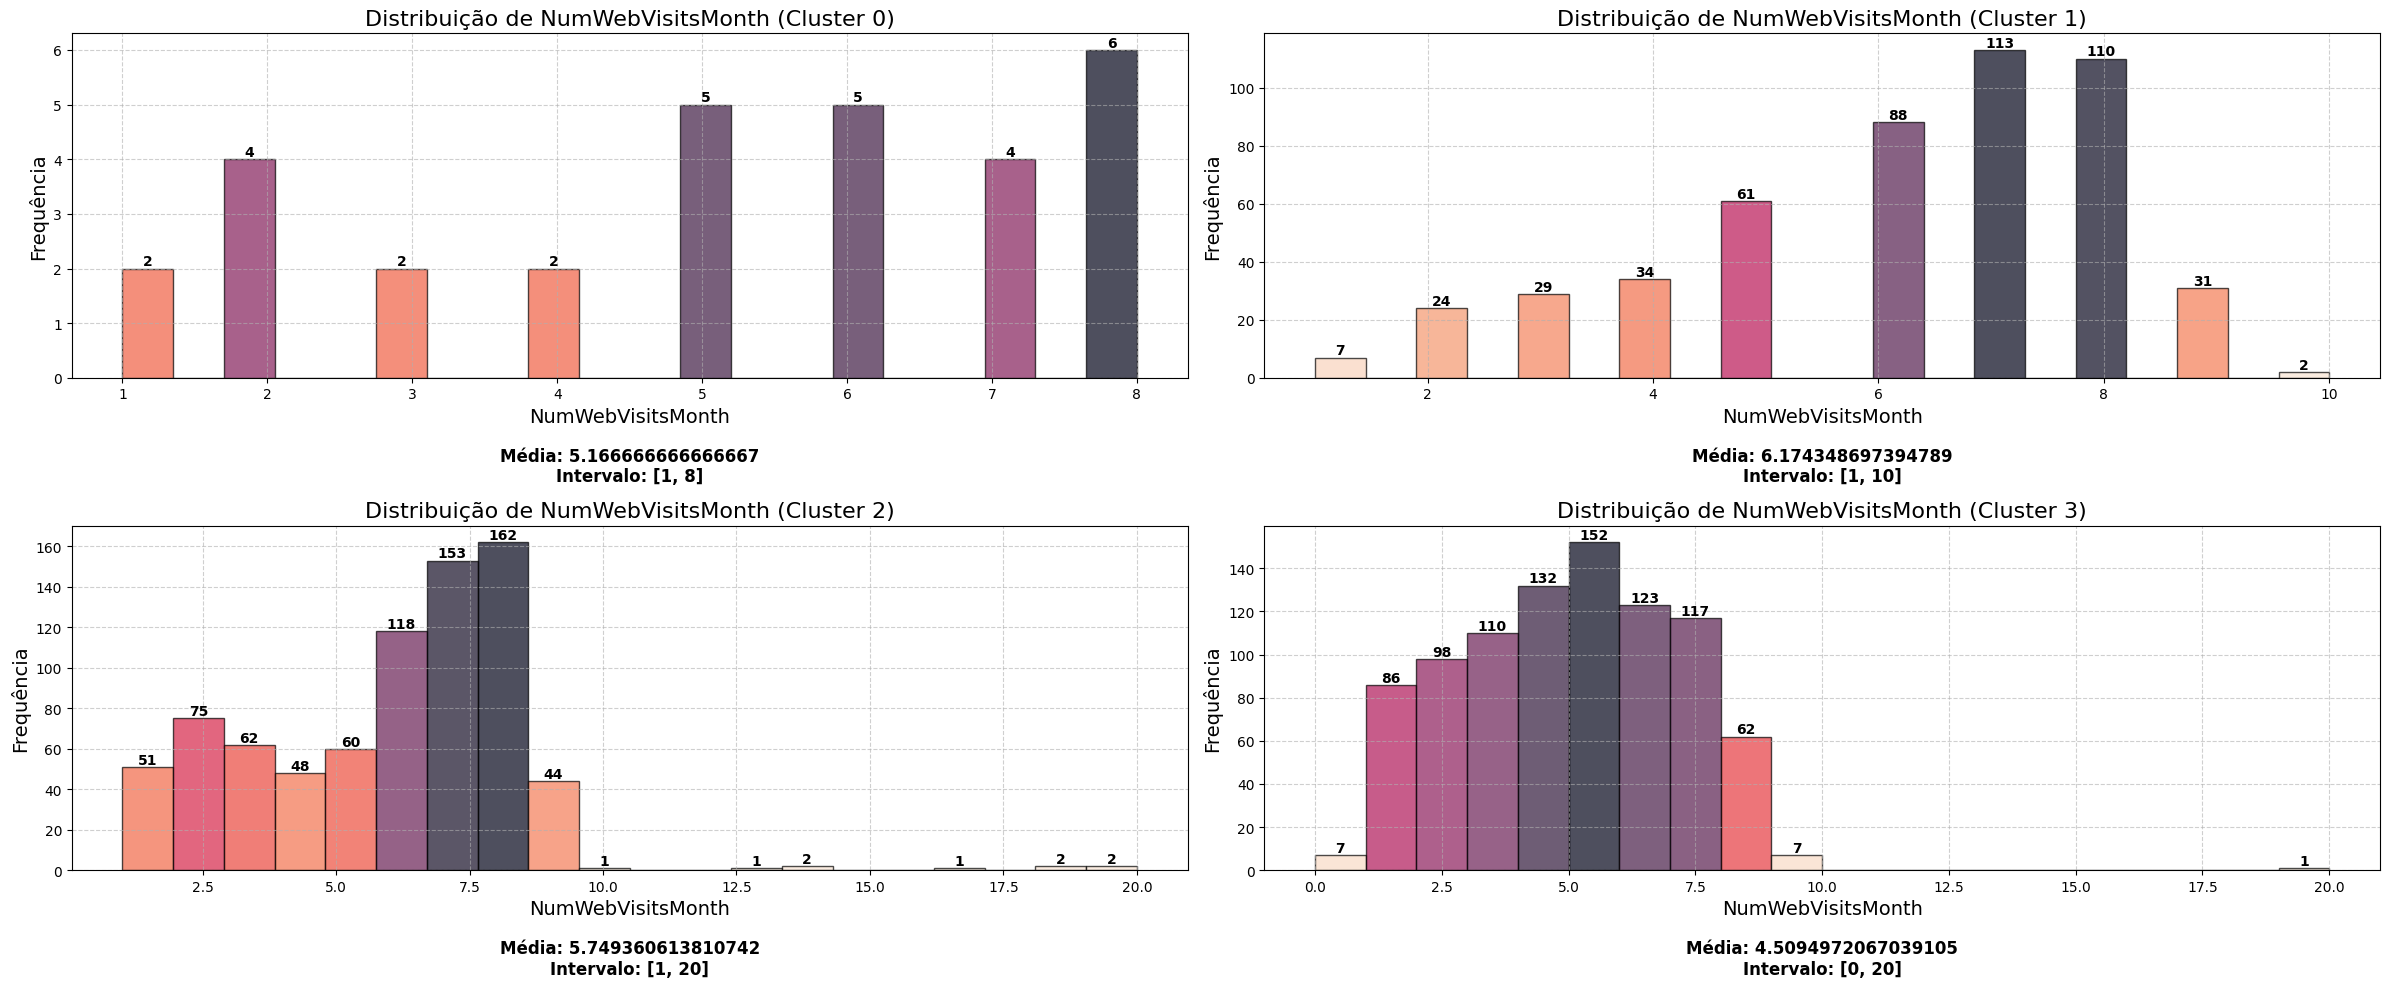

In [19]:
def plot_distribution_by_cluster(column):
    plt.figure(figsize=(24, 10))
    
    clusters = [0, 1, 2, 3]
    for i, cluster in enumerate(clusters, 1):
        plt.subplot(2, 2, i)
        cluster_data = df[df['Clusters'] == cluster]
        

        n, bins, patches = plt.hist(cluster_data[column], bins=20, color='blue', alpha=0.7, edgecolor='black')
        for j in range(len(patches)):
            patches[j].set_facecolor(sns.color_palette("rocket_r", as_cmap=True)(n[j] / max(n)))
            if n[j] > 0:
                plt.text(patches[j].get_x() + patches[j].get_width() / 2, n[j], int(n[j]), 
                            ha='center', va='bottom', fontsize=10, fontweight='bold')
        plt.title(f'Distribuição de {column} (Cluster {cluster})', fontsize=16)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Frequência', fontsize=14)
        
        plt.grid(True, linestyle='--', alpha=0.6)
        
        # Calcular a média e o intervalo dos valores
        mean_value = cluster_data[column].mean()
        min_value = cluster_data[column].min()
        max_value = cluster_data[column].max()
        
        # Adicionar a média e o intervalo abaixo do gráfico
        plt.text(0.5, -0.2, f'Média: {format(mean_value)}\nIntervalo: [{min_value}, {max_value}]', 
                 ha='center', va='top', fontsize=12, fontweight='bold', transform=plt.gca().transAxes)
    
    plt.tight_layout()
    plt.show()

lista = ['Income', 'Age', 'Recency', 'MntWines', 'MntFruits',
        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
        'MntGoldProds', 'TotalMntSpent', 'TotalPurchases',
        'NumDealsPurchases',  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

for col in lista:
    plot_distribution_by_cluster(col)

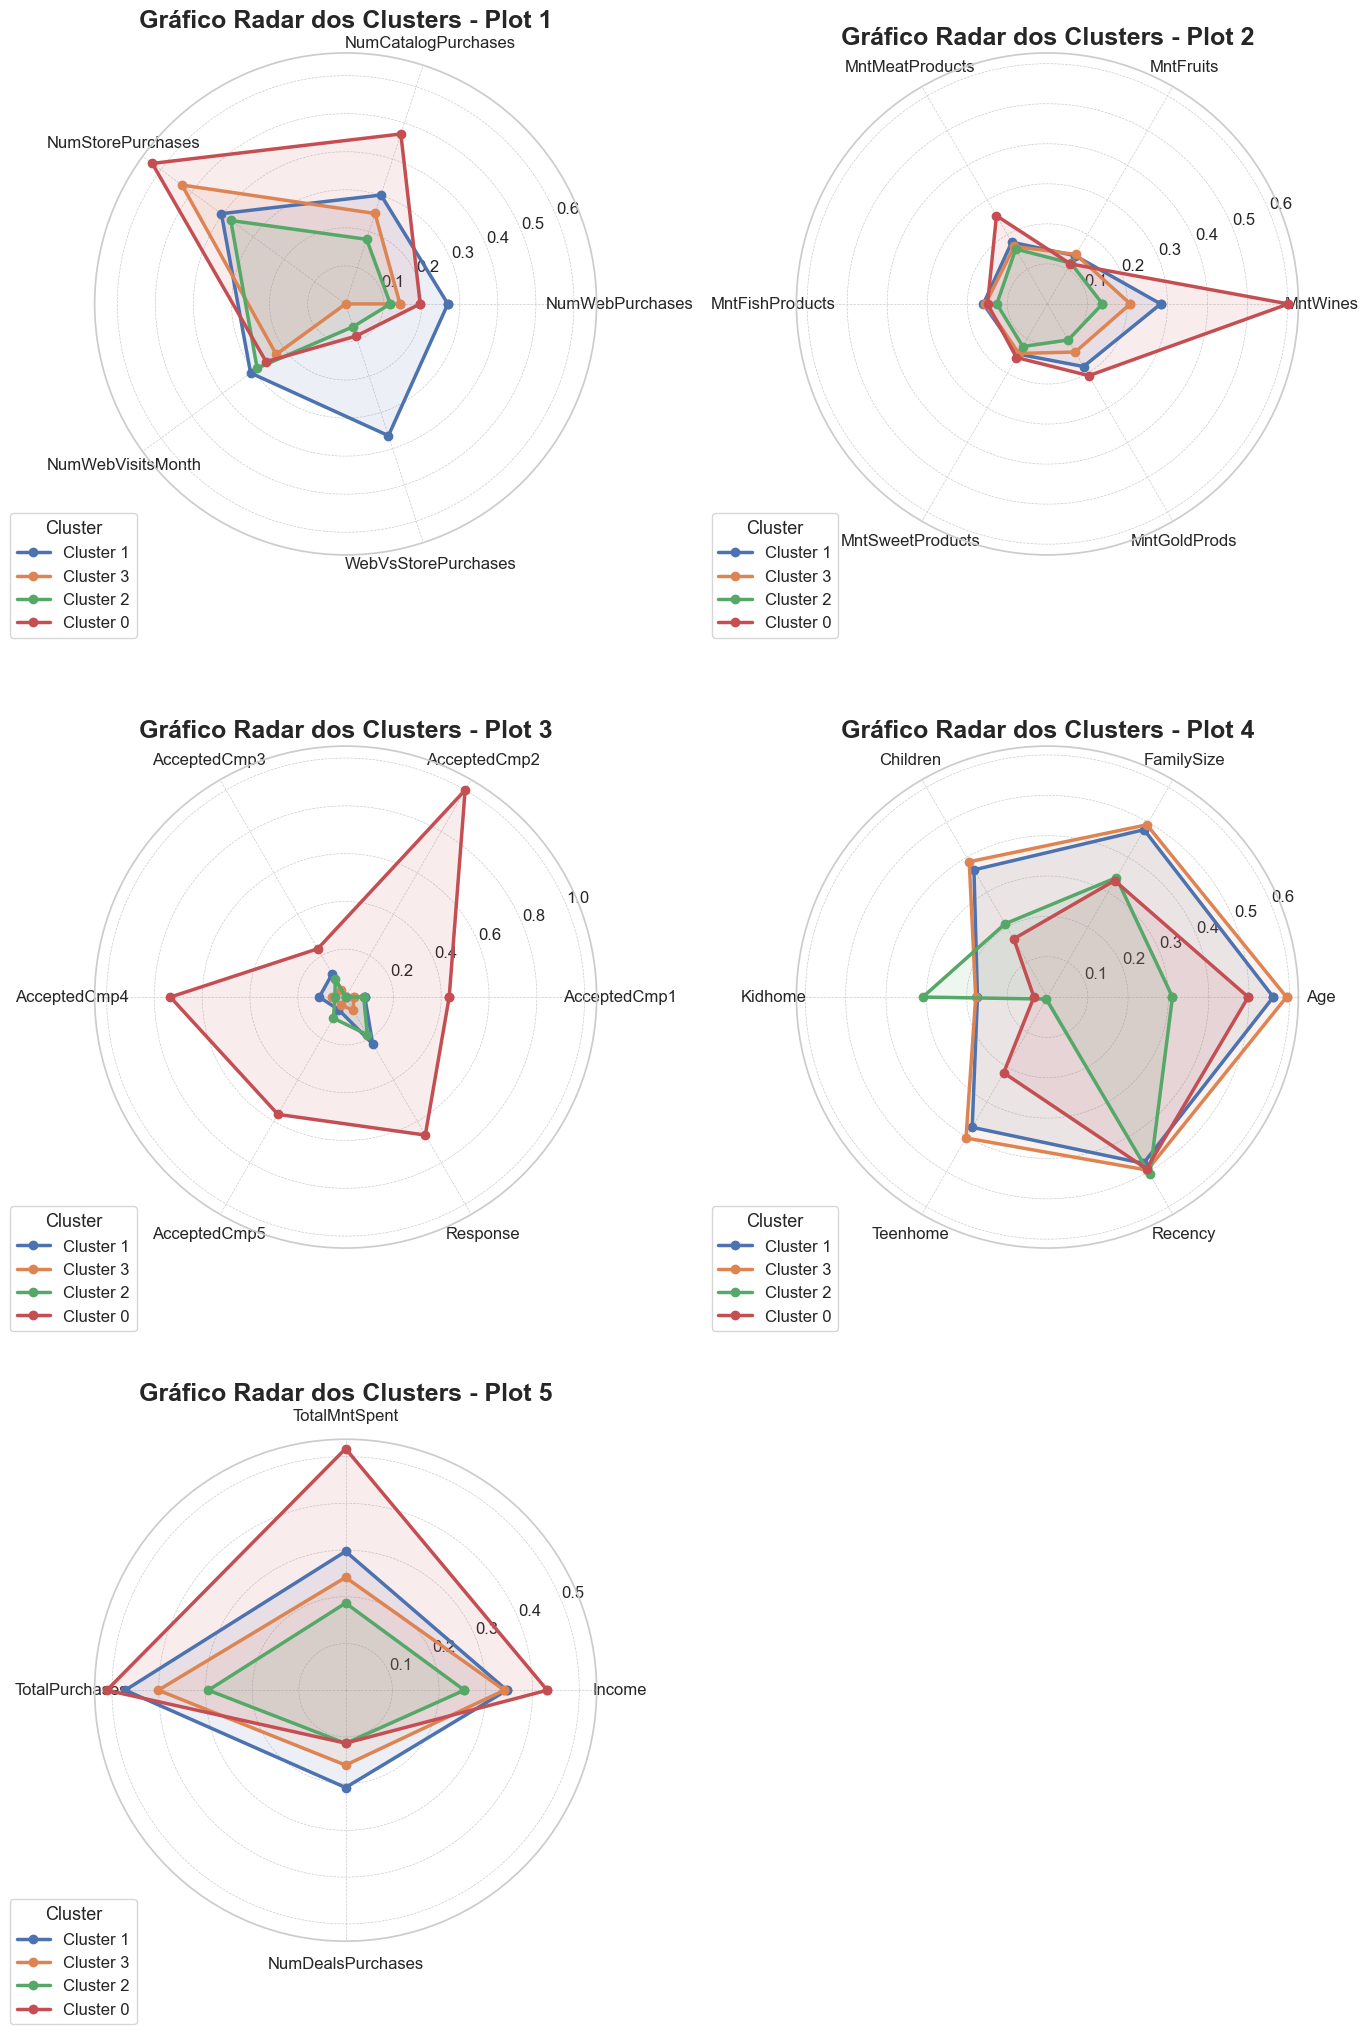

In [20]:
def radar(multiple_columns):
    # Definir o estilo do Seaborn
    sns.set(style='whitegrid')
    
    # Selecionar as colunas de interesse
    clusters = df['Clusters'].unique()

    # Normalizar os dados
    df_normalized = df.copy()
    for columns in multiple_columns:
        for column in columns:
            df_normalized[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

    # Criar o gráfico de Radar
    num_plots = len(multiple_columns)
    num_rows = (num_plots + 1) // 2
    fig, axs = plt.subplots(num_rows, 2, figsize=(14, 7 * num_rows), subplot_kw=dict(polar=True))

    axs = axs.flatten()

    for idx, columns in enumerate(multiple_columns):
        data = []
        for cluster in clusters:
            cluster_data = df_normalized[df_normalized['Clusters'] == cluster][columns].mean().tolist()
            data.append(cluster_data)

        N = len(columns)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]

        ax = axs[idx]
        for i, cluster_data in enumerate(data):
            values = cluster_data + cluster_data[:1]
            ax.plot(angles, values, linewidth=2.5, linestyle='solid', marker='o', label=f'Cluster {clusters[i]}')
            ax.fill(angles, values, alpha=0.1)

        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(columns, fontsize=12)
        ax.tick_params(axis='y', labelsize=12)
        ax.set_title(f'Gráfico Radar dos Clusters - Plot {idx+1}', fontsize=18, fontweight='bold')
        ax.legend(title='Cluster', title_fontsize='13', fontsize='12', loc='upper right', bbox_to_anchor=(0.1, 0.1))
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Rimuovere eventuali subplot vuoti
    for j in range(idx + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout(pad=2.0)
    plt.show()

# Exemplo de uso
radar([
    ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'WebVsStorePurchases'],
    ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
    ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'],
    ['Age', 'FamilySize', 'Children', 'Kidhome', 'Teenhome', 'Recency'],
    ['Income', 'TotalMntSpent', 'TotalPurchases', 'NumDealsPurchases']
])

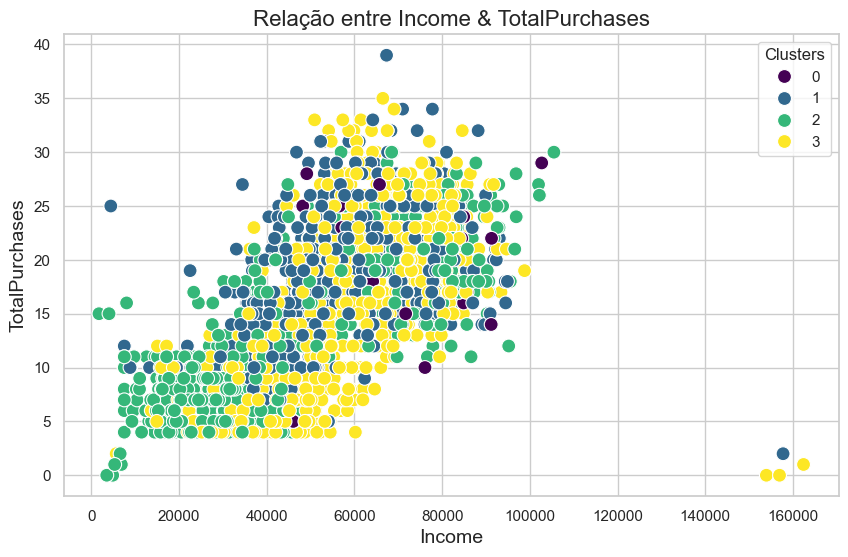

In [21]:
def dispersion(col1, col2, hue=None):
    # Definir o estilo do gráfico
    sns.set(style="whitegrid")

    # Criar o gráfico de dispersão
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=col1, y=col2, hue=hue, palette='viridis', s=100)

    # Adicionar título e rótulos aos eixos
    plt.title(f'Relação entre {col1} & {col2}', fontsize=16)
    plt.xlabel(col1, fontsize=14)
    plt.ylabel(col2, fontsize=14)

    # Adicionar uma grade
    plt.grid(True)

    # Mostrar o gráfico
    plt.show()

dispersion('Income', 'TotalPurchases', 'Clusters')

In [22]:
# Função para criar o pairplot
def criar_pairplot(coluna_principal, lista):
    # Adicionar colunas necessárias para o gráfico
    df['Customer_for'] = (pd.to_datetime('today') - pd.to_datetime(df['Dt_Customer'])).dt.days

    # Definir o tema e a paleta de cores
    sns.set_theme(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
    pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]

    # Selecionar as colunas para plotar
    To_Plot = lista + [coluna_principal, "Customer_for"]
    
    # Criar o pairplot
    plt.figure()
    sns.pairplot(df[To_Plot], hue=coluna_principal, palette="mako")
    
    # Mostrar o gráfico
    plt.show()

    df.drop(columns=['Customer_for'], inplace=True)

def test():
    df['Clusters'] = df['Clusters'].astype('category')
    criar_pairplot('Clusters', ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'TotalMntSpent', 'TotalPurchases'])

#test()

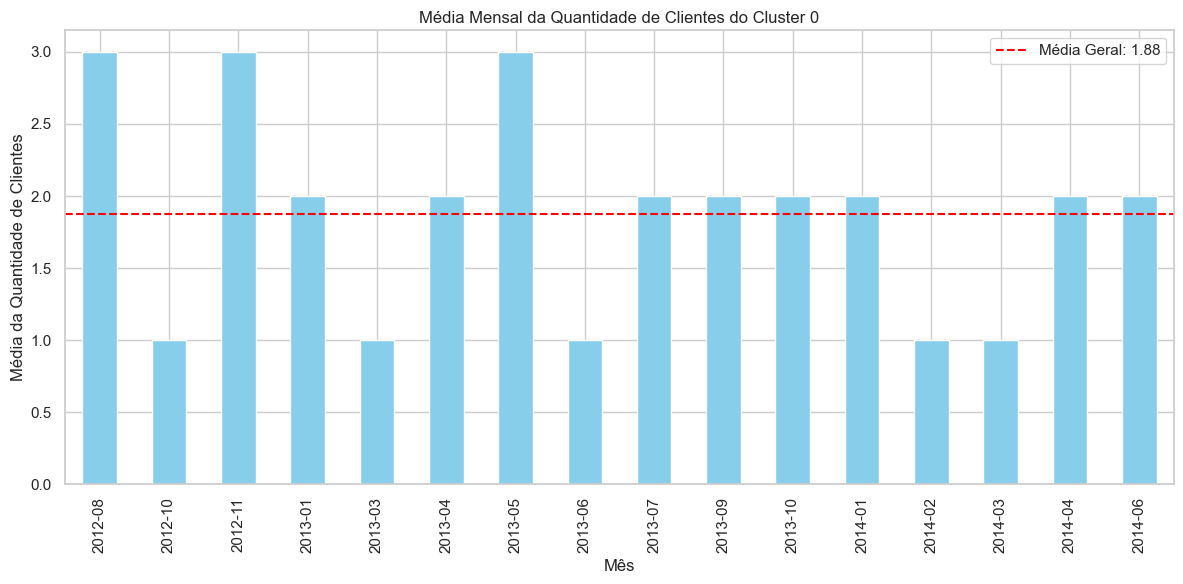

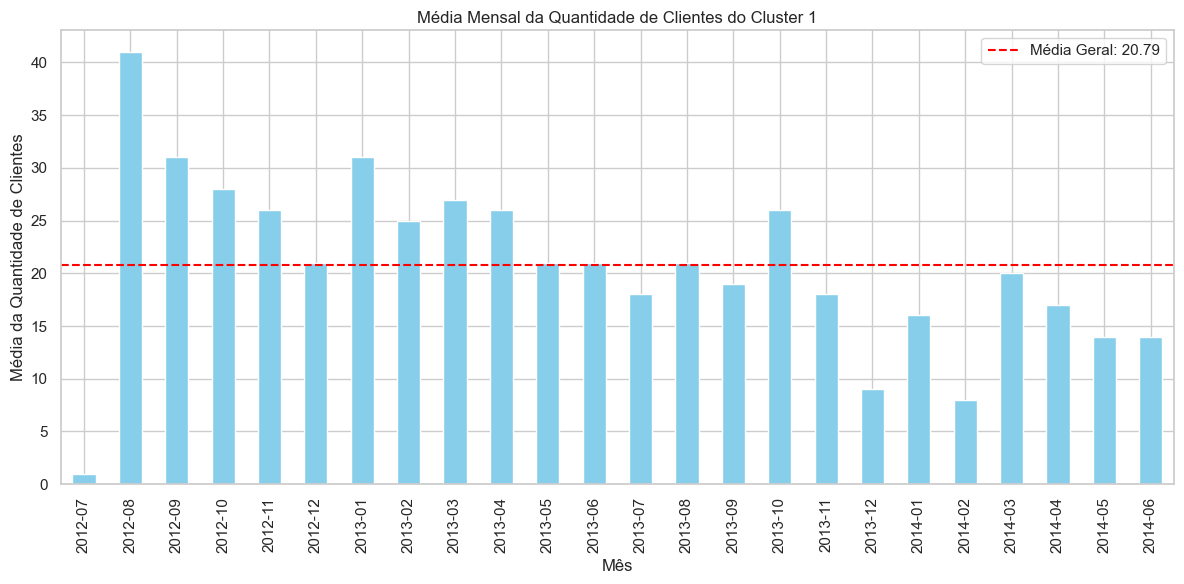

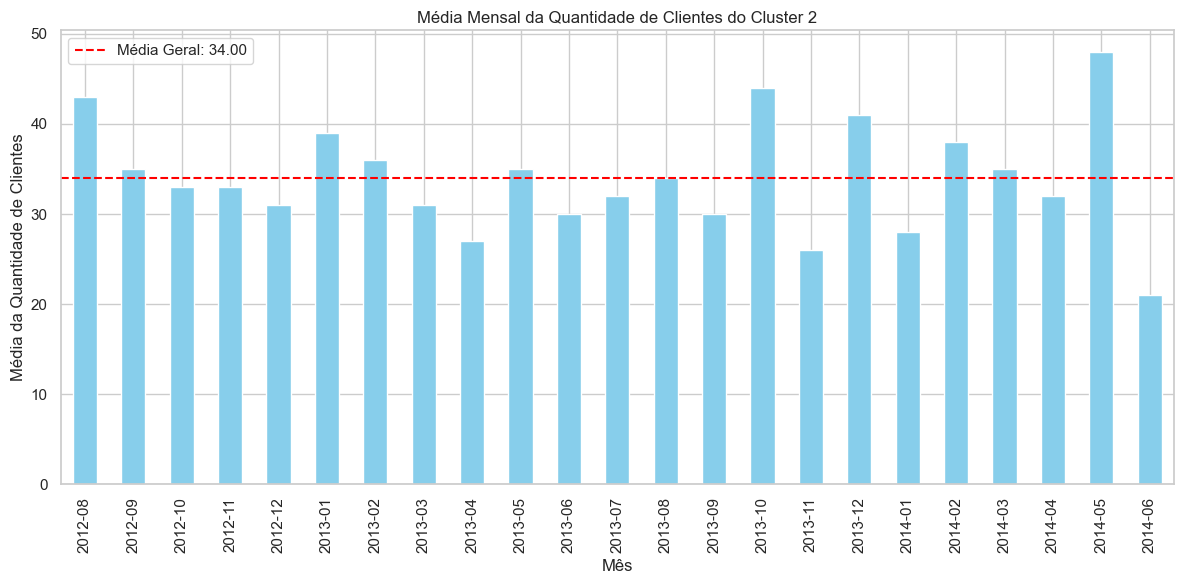

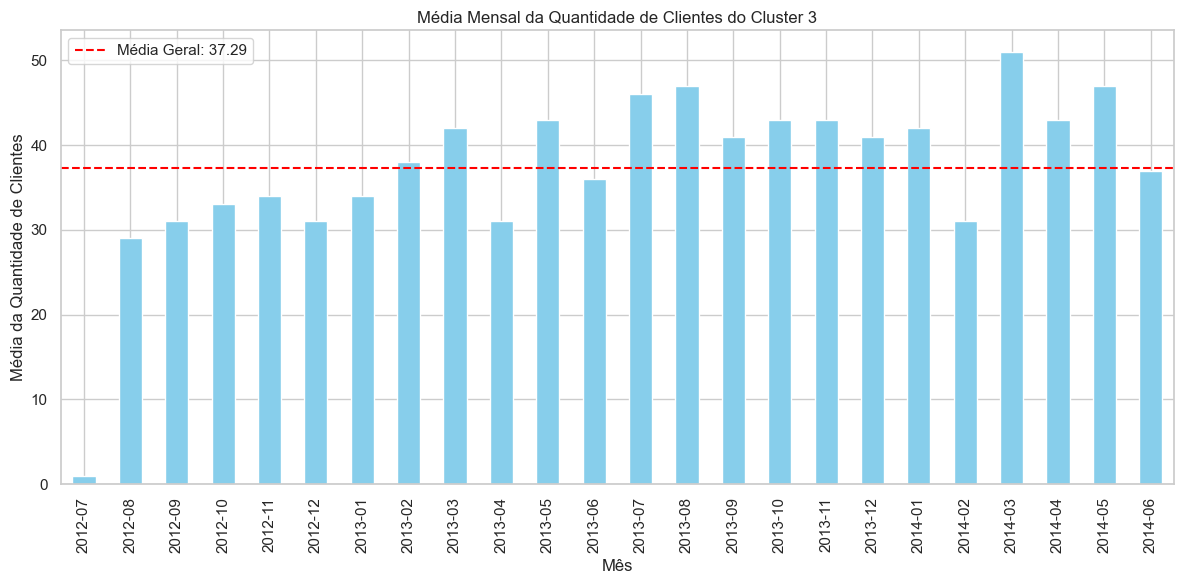

In [23]:
def timeline_clusters(data, num):
    # Filtrar os dados para o Cluster
    cluster_data = data[data['Clusters'] == num].copy()

    # Converter a coluna 'Date' para datetime
    cluster_data['Date'] = pd.to_datetime(cluster_data['Date'])

    # Criar uma nova coluna para o ano e o mês
    cluster_data['YearMonth'] = cluster_data['Date'].dt.to_period('M')

    # Calcular a média mensal da quantidade de clientes
    monthly_avg = cluster_data.groupby('YearMonth').size()

    # Calcular a média geral
    overall_mean = monthly_avg.mean()

    # Criar o gráfico de barras
    plt.figure(figsize=(12, 6))
    monthly_avg.plot(kind='bar', color='skyblue')

    # Adicionar uma linha vermelha para a média
    plt.axhline(y=overall_mean, color='red', linestyle='--', label=f'Média Geral: {overall_mean:.2f}')

    # Personalizar o gráfico
    plt.title(f'Média Mensal da Quantidade de Clientes do Cluster {num}')
    plt.xlabel('Mês')
    plt.ylabel('Média da Quantidade de Clientes')
    plt.legend()
    plt.tight_layout()

    # Mostrar o gráfico
    plt.show()

timeline_clusters(df, 0)
timeline_clusters(df, 1)
timeline_clusters(df, 2)
timeline_clusters(df, 3)

# Insights

### **Cluster 0**
Este grupo consiste em consumidores com renda média alta, geralmente acima dos 45 anos, que investem significativamente em produtos de luxo e bebidas alcoólicas. São casados ou em relacionamentos, com famílias pequenas ou sem filhos. O comportamento de compra reflete um estilo de vida sofisticado, com alta aceitação em campanhas de marketing.

- **Idade média**: 45,9 anos (máximo: 62 anos).  
- **Renda média**: R$71.054 (variação: R$46.015 - R$102.692).  
- **Gastos principais**: Vinhos (R$898), carnes (R$250), produtos de luxo (R$66).  
- **Gasto total médio**: R$1.307 por ano.  
- **Participação em campanhas**: Alta, com grande aceitação em todas as campanhas.  
- **Tamanho familiar**: Pequeno (média de 1,3 pessoas).
- **Estado civil**:  
   - Tem forte presença na categoria **Junto(a)**, indicando que muitos clientes desse cluster estão em relacionamentos (uniões estáveis, mas não formalmente casados).  
   - Também apresenta uma participação notável em **Casado(a)** e **Solteiro(a)**, mas menor em outras categorias como **Divorciado(a)** e **Viúvo(a)**.  
   - Pode representar pessoas em relacionamentos, mas não exclusivamente casadas, talvez em uma fase de vida de estabilidade conjugal.
---

### **Cluster 1**
Este cluster é composto por consumidores de meia idade com renda média moderada. São levemente propensos a gastar em vinhos e carnes, mas seus gastos gerais são mais conservadores. Embora geralmente casados, suas famílias são pequenas ou inexistentes.

- **Idade média**: 49,3 anos (máximo: 73 anos).  
- **Renda média**: R$57.148 (variação: R$4.428 - R$157.733).  
- **Gastos principais**: Vinhos (R$422), carnes (R$175), frutas (R$28).  
- **Gasto total médio**: R$753 por ano.  
- **Participação em campanhas**: Moderada, com taxas de resposta em torno de 22%.  
- **Tamanho familiar**: Pequeno (média de 1,9 pessoas).
- **Estado civil**:  
   - Este cluster parece mais equilibrado, com proporções relativamente distribuídas entre **Casado(a)**, **Junto(a)** e **Solteiro(a)**, mas sem grandes picos em nenhuma categoria específica.  
   - Mostra proporções baixas nas categorias como **Viúvo(a)**, o que pode indicar que o cluster inclui pessoas com status civil mais convencionais.  
   - Pode representar um perfil mais diversificado em termos de estado civil.

---

### **Cluster 2**
Predominantemente jovens adultos, este cluster tem a menor renda média e um perfil de consumo básico. A maioria dos gastos é concentrada em carne, vinhos e itens essenciais. Eles tendem a responder menos às campanhas, provavelmente devido às restrições financeiras.

- **Idade média**: 35,4 anos (máximo: 63 anos).  
- **Renda média**: R$42.541 (variação: R$1.730 - R$105.471).  
- **Gastos principais**: Carne (R$155), vinhos (R$205), peixe (R$32).  
- **Gasto total médio**: R$474 por ano.  
- **Participação em campanhas**: Moderada, com resposta de 18%.  
- **Tamanho familiar**: Pequeno (média de 1,3 pessoas).
- **Estado civil**:  
   - Este cluster se destaca fortemente na categoria **Casado(a)**, mostrando que a maioria das pessoas nele está formalmente casada.  
   - Possui proporções significativamente menores nas categorias **Solteiro(a)**, **Junto(a)** e quase inexistentes nas categorias **Viúvo(a)**.
   - Pode ser caracterizado como um cluster de pessoas em relacionamentos formais e estáveis.

---

### **Cluster 3**
Um grupo diversificado em termos de idade e renda, com comportamento de compra balanceado. Seus gastos incluem itens de maior valor como vinhos e carnes, mas também compras de itens diversificados. Eles têm uma resposta média às campanhas.

- **Idade média**: 51,2 anos (máximo: 74 anos).  
- **Renda média**: R$56.332 (variação: R$5.648 - R$162.397).  
- **Gastos principais**: Vinhos (R$309), carnes (R$163), frutas (R$28).  
- **Gasto total médio**: R$613 por ano.  
- **Participação em campanhas**: Moderada, com resposta de 6%.  
- **Tamanho familiar**: Pequeno (média de 1,9 pessoas).
- **Estado civil**:  
   - Apresenta maior proporção em **Solteiro(a)**, indicando que muitos clientes neste cluster estão solteiros.  
   - Tem menor presença em categorias como **Casado(a)** e **Junto(a)** e proporções muito pequenas em **Viúvo(a)**.  
   - Representa um perfil de pessoas solteiras, possivelmente em uma fase de vida mais independente.

---

C:\Users\schit\AppData\Local\Temp\ipykernel_21624\3078037843.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sem_outliers, x='Clusters', y=col, palette='muted')


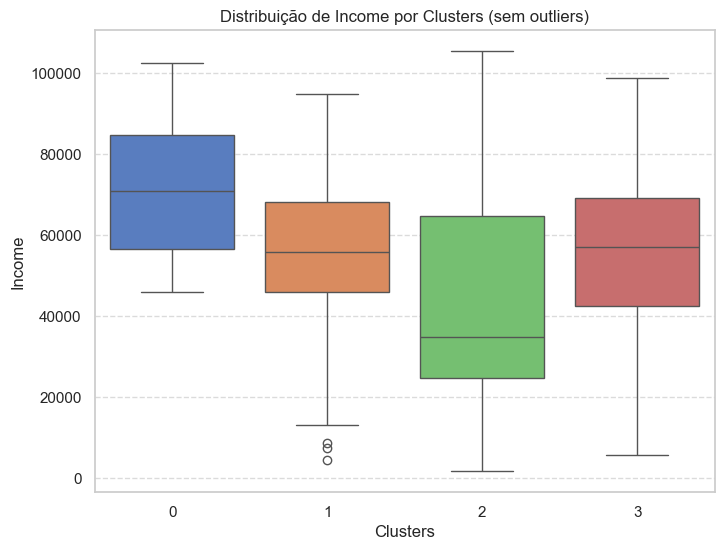

C:\Users\schit\AppData\Local\Temp\ipykernel_21624\3078037843.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sem_outliers, x='Clusters', y=col, palette='muted')


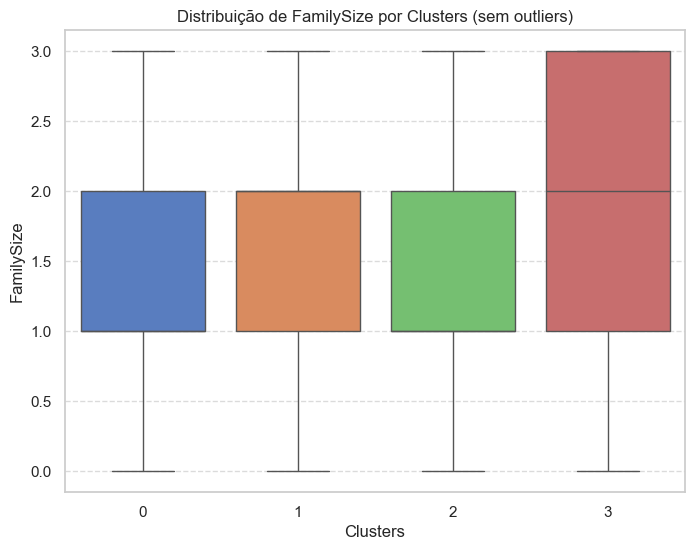

C:\Users\schit\AppData\Local\Temp\ipykernel_21624\3078037843.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sem_outliers, x='Clusters', y=col, palette='muted')


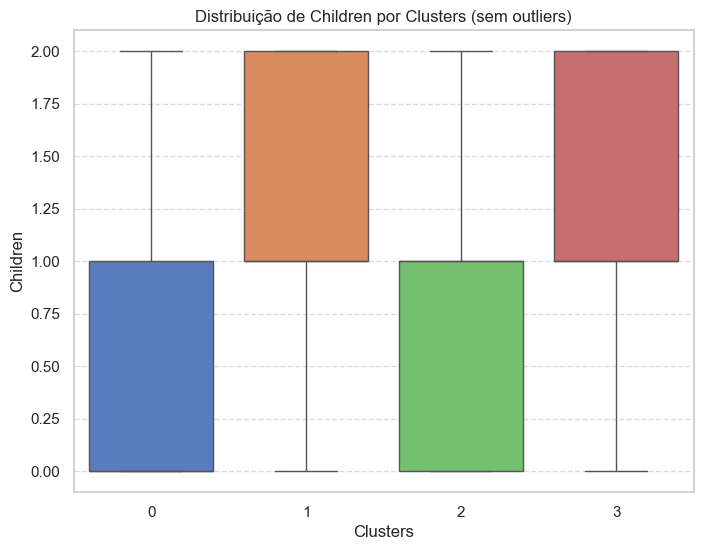

C:\Users\schit\AppData\Local\Temp\ipykernel_21624\3078037843.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sem_outliers, x='Clusters', y=col, palette='muted')


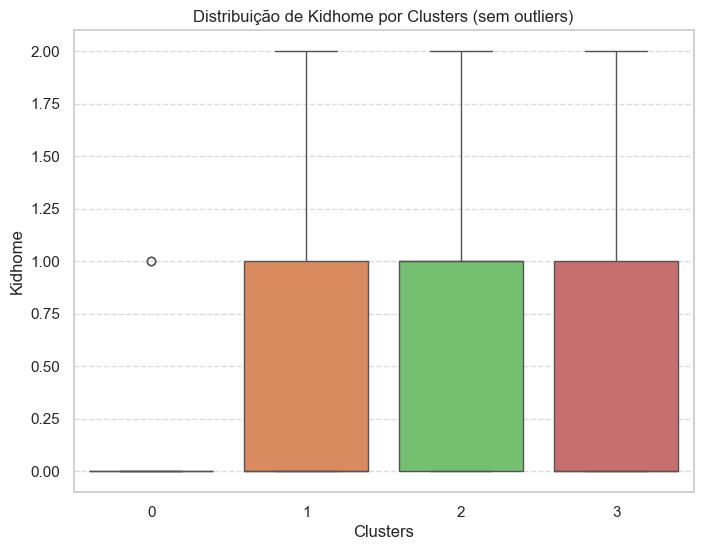

C:\Users\schit\AppData\Local\Temp\ipykernel_21624\3078037843.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sem_outliers, x='Clusters', y=col, palette='muted')


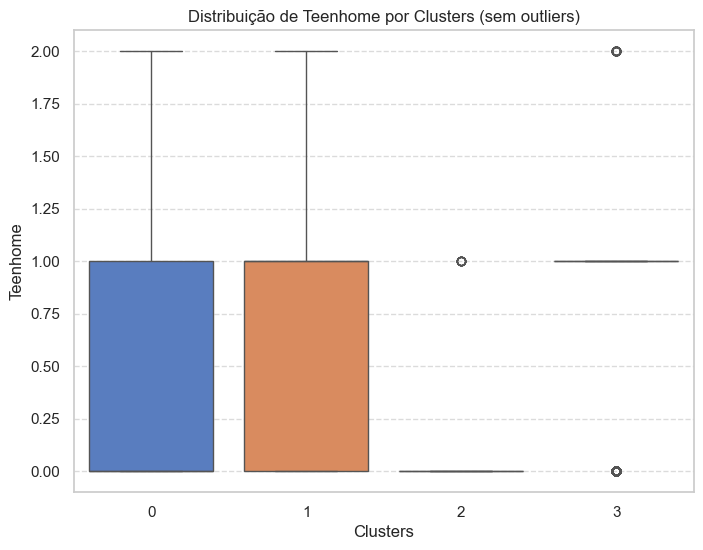

C:\Users\schit\AppData\Local\Temp\ipykernel_21624\3078037843.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sem_outliers, x='Clusters', y=col, palette='muted')


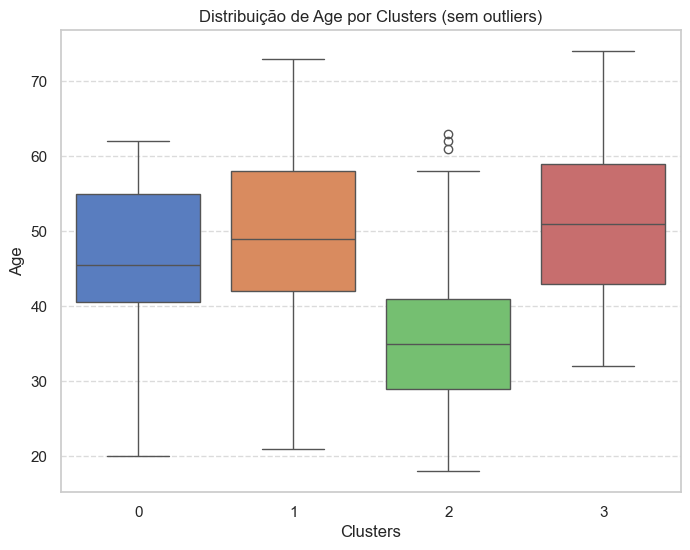

In [24]:
def clusters_compar_bloxplot(df, col):
    # Cálculo do IQR (Intervalo Interquartil) para a coluna
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Definição dos limites para identificar os outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Remoção dos outliers
    df_sem_outliers = df[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]

    # Criação do boxplot sem outliers
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_sem_outliers, x='Clusters', y=col, palette='muted')
    plt.title(f'Distribuição de {col} por Clusters (sem outliers)')
    plt.xlabel('Clusters')
    plt.ylabel(col)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

for x in ['Income', 'FamilySize', 'Children', 'Kidhome', 'Teenhome', 'Age']:
    clusters_compar_bloxplot(df, x)

C:\Users\schit\AppData\Local\Temp\ipykernel_21624\1564965764.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


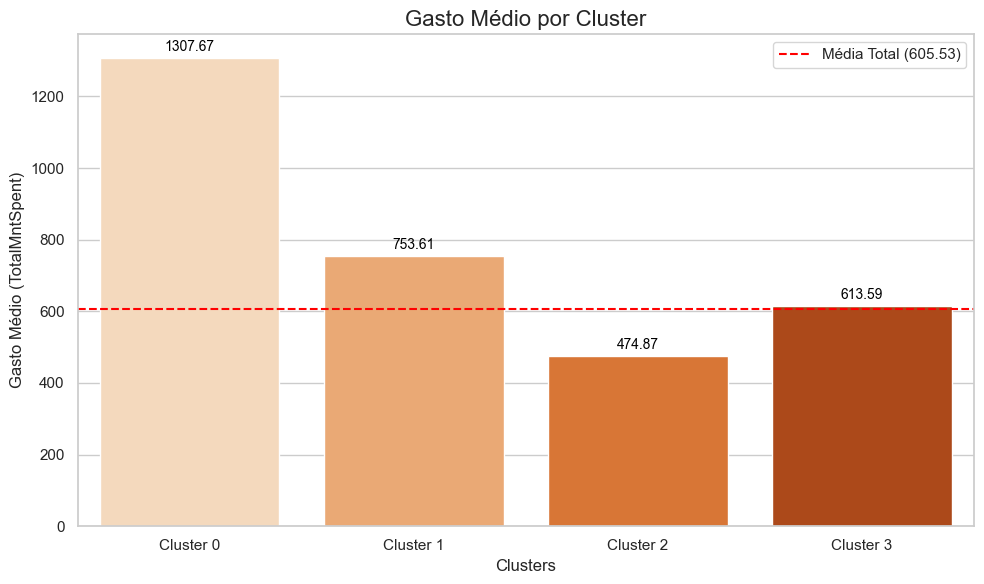

In [100]:
# Cálculo do gasto médio por cluster e geral
avg_spent_per_cluster = df.groupby("Clusters")["TotalMntSpent"].mean().reset_index()
avg_spent_per_cluster["Clusters"] = avg_spent_per_cluster["Clusters"].apply(lambda x: f"Cluster {x}")  # Renomeia os clusters
overall_avg = df["TotalMntSpent"].mean()

# Paleta de cores com diferentes tons de laranja
colors = sns.color_palette("Oranges", len(avg_spent_per_cluster))

# Configuração do estilo do gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Gráfico de barras com cores personalizadas
ax = sns.barplot(
    x="Clusters", 
    y="TotalMntSpent", 
    data=avg_spent_per_cluster, 
    palette=colors
)

# Adiciona os números exatos acima de cada barra
for i, row in avg_spent_per_cluster.iterrows():
    plt.text(i, row["TotalMntSpent"] + 20, f'{row["TotalMntSpent"]:.2f}', ha='center', fontsize=10, color="black")

# Adiciona a linha vermelha tracejada para a média geral
plt.axhline(overall_avg, color="red", linestyle="--", label=f"Média Total ({overall_avg:.2f})")

# Personalizações
plt.title("Gasto Médio por Cluster", fontsize=16)
plt.xlabel("Clusters", fontsize=12)
plt.ylabel("Gasto Médio (TotalMntSpent)", fontsize=12)
plt.legend()
plt.tight_layout()

# Mostra o gráfico
plt.show()

In [70]:
def plot_multiple_barplots(df, columns_dict, clusters_column="Clusters", num_cols=2):
    """
    Gera múltiplos gráficos de barras mostrando a média por cluster para cada coluna especificada,
    com títulos personalizados.
    
    Parâmetros:
    - df: DataFrame com os dados.
    - columns_dict: Dicionário onde as chaves são os nomes das colunas e os valores são os títulos personalizados.
    - clusters_column: Nome da coluna que representa os clusters (padrão: "Clusters").
    - num_cols: Número de gráficos por linha (padrão: 2).
    """
    num_rows = -(-len(columns_dict) // num_cols)  # Calcula o número de linhas (arredondando para cima)
    
    # Configurações gerais do gráfico
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))
    
    # Transforma axes em uma lista plana (necessário se houver apenas uma linha ou uma coluna)
    if num_rows == 1 and num_cols == 1:
        axes = [axes]
    elif num_rows == 1 or num_cols == 1:
        axes = axes.flatten()
    else:
        axes = axes.flatten()
    
    # Remove eixos extras caso o número de gráficos seja menor que o número total de subplots
    for ax in axes[len(columns_dict):]:
        ax.remove()
    
    # Itera pelas colunas e cria os gráficos
    for i, (col, title) in enumerate(columns_dict.items()):
        # Calcula a média por cluster e a média geral
        avg_spent_per_cluster = df.groupby(clusters_column)[col].mean().reset_index()
        avg_spent_per_cluster[clusters_column] = avg_spent_per_cluster[clusters_column].apply(lambda x: f"Cluster {x}")
        overall_avg = df[col].mean()
        
        # Paleta de cores com diferentes tons de laranja
        colors = sns.color_palette("Oranges", len(avg_spent_per_cluster))
        
        # Cria o gráfico no eixo correspondente
        ax = axes[i]
        sns.barplot(
            x=clusters_column, 
            y=col, 
            data=avg_spent_per_cluster, 
            palette=colors, 
            ax=ax
        )
        
        # Adiciona os números exatos acima de cada barra
        for j, row in avg_spent_per_cluster.iterrows():
            ax.text(j, row[col] + 0.02 * overall_avg, f'{row[col]:.2f}', ha='center', fontsize=10, color="black")
        
        # Adiciona a linha média geral
        ax.axhline(overall_avg, color="red", linestyle="--", label=f"Média Total ({overall_avg:.2f})")
        
        # Personalizações
        ax.set_title(title, fontsize=14)
        ax.set_xlabel("Clusters", fontsize=12)
        ax.set_ylabel(f"Média ({col})", fontsize=12)
        ax.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
# Calcular a porcentagem de "TotalMntSpent" em relação a "Income"
df['PctTotalMntSpent'] = (df['TotalMntSpent'] / df['Income']) * 100

columns_to_analyze = {
    "PctTotalMntSpent": "PctTotalMntSpent",
    "WebVsStorePurchases": "WebVsStorePurchases"
}

plot_multiple_barplots(df, columns_to_analyze)

C:\Users\schit\AppData\Local\Temp\ipykernel_21624\2930121361.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\schit\AppData\Local\Temp\ipykernel_21624\2930121361.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\schit\AppData\Local\Temp\ipykernel_21624\2930121361.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


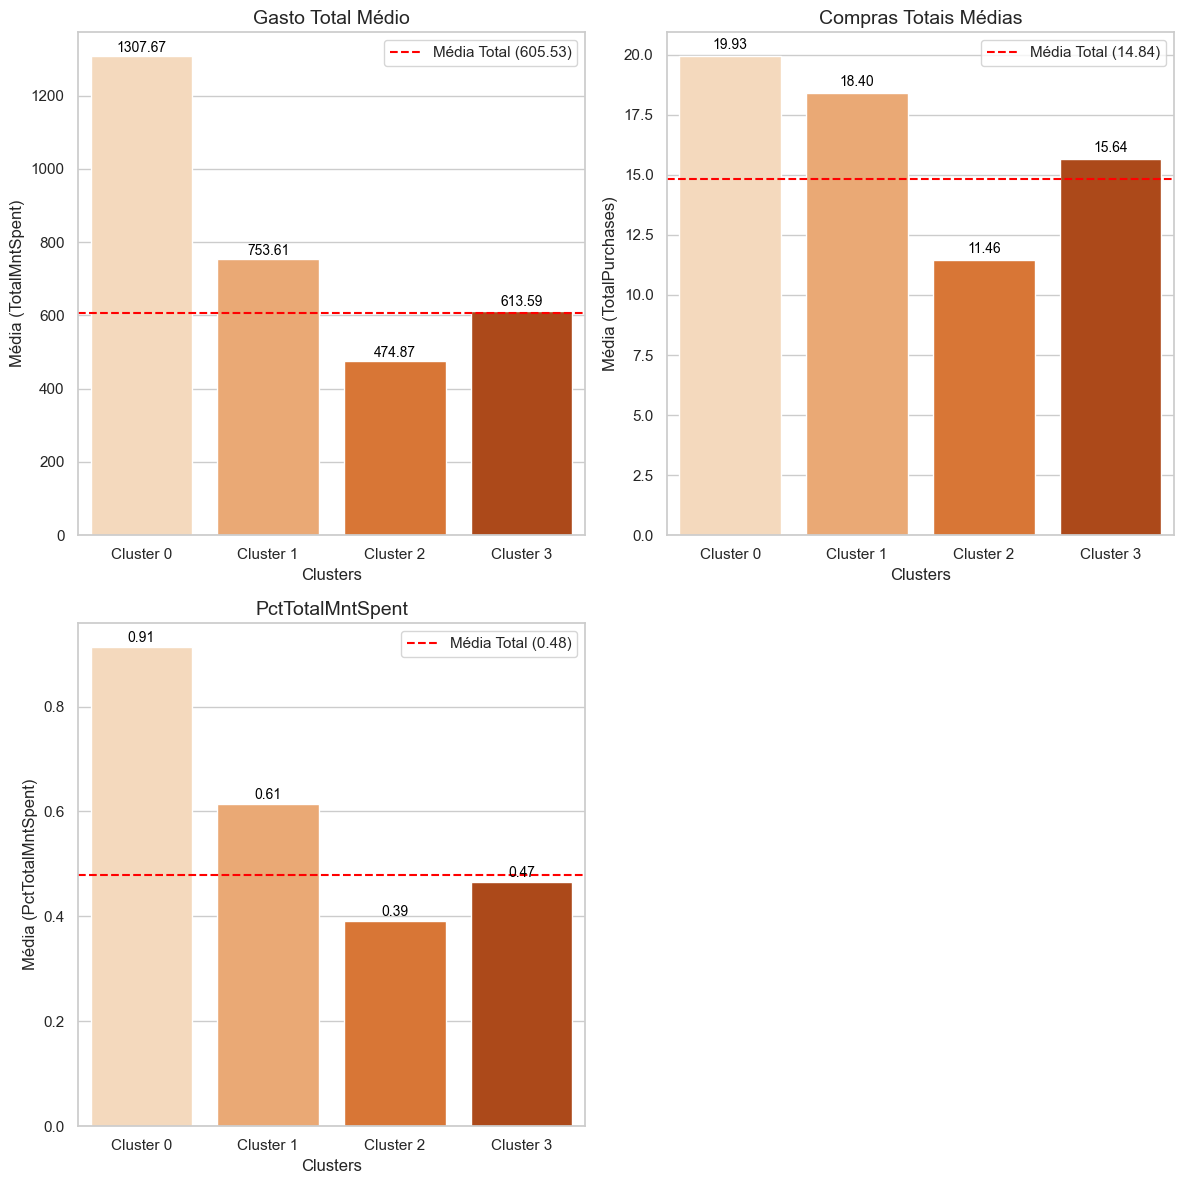

In [120]:
columns_to_analyze = {
    "TotalMntSpent": "Gasto Total Médio",
    "TotalPurchases": "Compras Totais Médias",
    "PctTotalMntSpent": "PctTotalMntSpent"
}

# Calcular a porcentagem de "TotalMntSpent" em relação a "Income"
df['Month_Income'] = df['Income'] / 12
df['Month_TotalMntSpent'] = df['TotalMntSpent'] / 2
df['Month_TotalMntSpent'] = df['Month_TotalMntSpent'] / 12

df['PctTotalMntSpent'] = (df['Month_TotalMntSpent'] / df['Month_Income']) * 100

plot_multiple_barplots(df, columns_to_analyze)


df.drop(columns=['Month_Income', 'Month_TotalMntSpent', 'PctTotalMntSpent'], inplace=True)

C:\Users\schit\AppData\Local\Temp\ipykernel_21624\2930121361.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\schit\AppData\Local\Temp\ipykernel_21624\2930121361.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\schit\AppData\Local\Temp\ipykernel_21624\2930121361.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\schit\AppData\Local\Temp\ipykernel_21624\2930121361.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

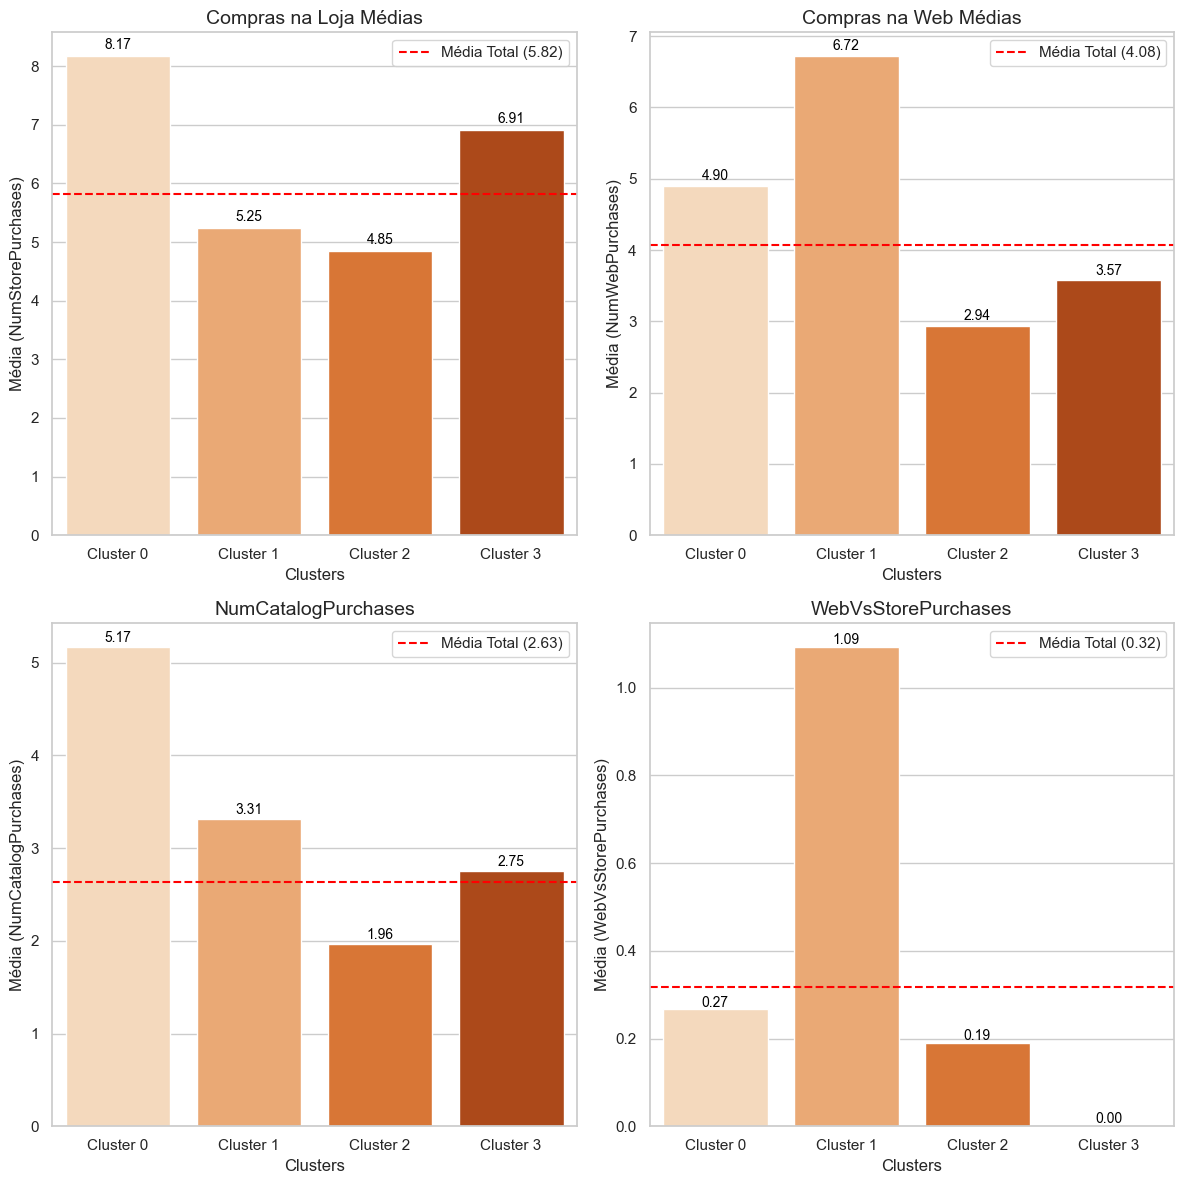

In [81]:
columns_to_analyze = {
    "NumStorePurchases": "Compras na Loja Médias",
    "NumWebPurchases": "Compras na Web Médias",
    "NumCatalogPurchases": "NumCatalogPurchases",
    "WebVsStorePurchases": "WebVsStorePurchases"
}

plot_multiple_barplots(df, columns_to_analyze)

C:\Users\schit\AppData\Local\Temp\ipykernel_21624\2930121361.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\schit\AppData\Local\Temp\ipykernel_21624\2930121361.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\schit\AppData\Local\Temp\ipykernel_21624\2930121361.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\schit\AppData\Local\Temp\ipykernel_21624\2930121361.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

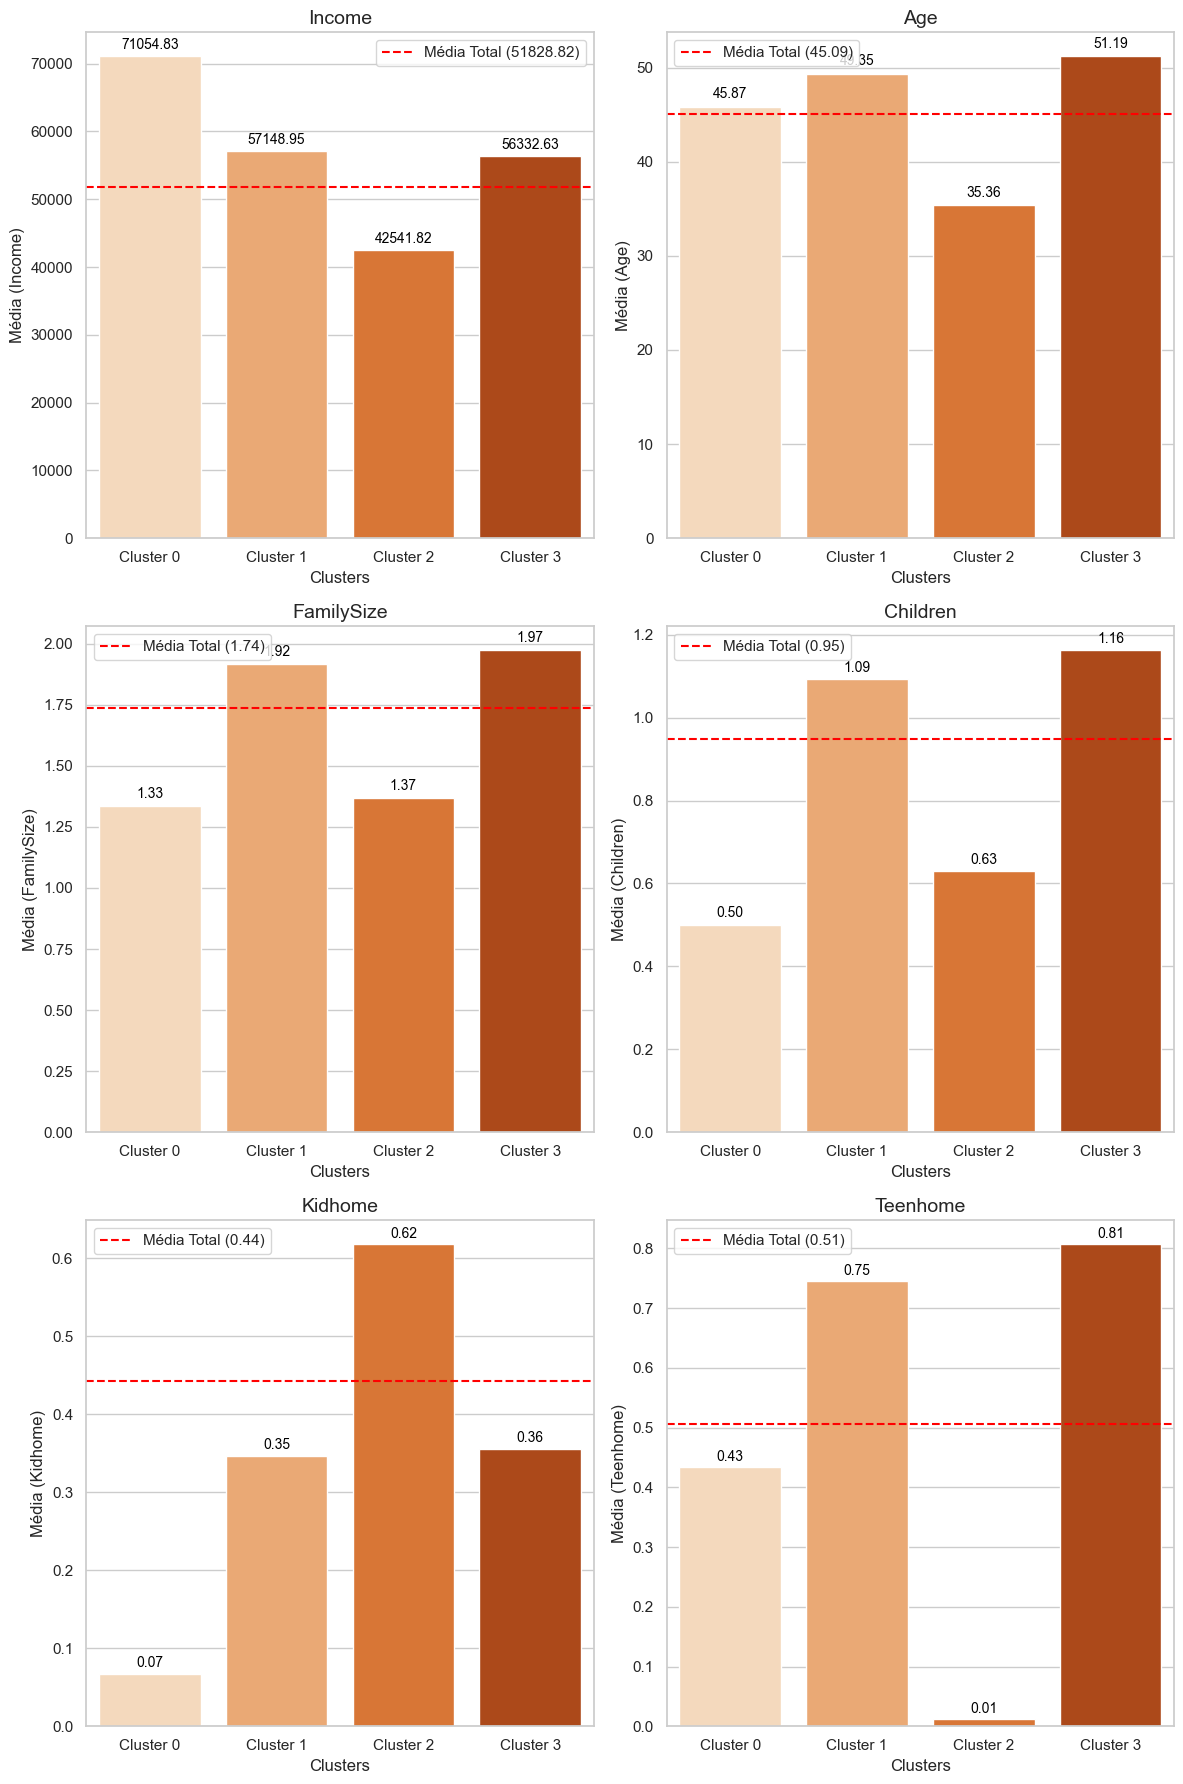

In [82]:
columns_to_analyze = {
    "Income": "Income",
    "Age": "Age",
    "FamilySize": "FamilySize",
    "Children": "Children",
    "Kidhome": "Kidhome",
    "Teenhome": "Teenhome"
}

plot_multiple_barplots(df, columns_to_analyze)

# Conclusões da análise